# Set up Coding Environment 

In [1]:
# Import Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import sklearn
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import (confusion_matrix, 
                             roc_auc_score, 
                             average_precision_score)
from sklearn.model_selection import cross_val_score
import warnings
import time
warnings.filterwarnings("ignore")

from multiprocessing import Pool
import dask.dataframe as dd
from dask.distributed import Client
from dask.diagnostics import ProgressBar
from collections import Counter

# Import Loan Dataset

In [2]:
# set up table for all loans
df_setup = pd.read_csv('/Users/miracles/Desktop/practicum/Processed Data/df_orig.csv')
df_setup.head()

,Loan Sequence Number,First Payment Date,Original Loan Term,Original UPB,Mortgage Insurance Percentage (MI %),Original Loan-to-Value (LTV),Original Interest Rate,Channel,Loan Purpose,Super Conforming Flag,Credit Score,First Time Homebuyer Flag,Original Debt-to-Income (DTI) Ratio,Number of Borrowers,Number of Units,Occupancy Status,Property State,Property Type,Property Valuation Method,Valid DTI Ratio
0,F11Q10000044,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1
1,F11Q10000226,201104,360.0,70000.0,0.0,59.0,4.500,R,N,0,723.0,N,29.0,2.0,1.0,P,MO,SF,9.0,1
2,F11Q10000231,201103,360.0,125000.0,0.0,52.0,4.250,R,C,0,773.0,N,50.0,2.0,1.0,P,MA,SF,9.0,1
3,F11Q10000391,201103,360.0,216000.0,0.0,71.0,4.250,R,C,0,784.0,N,19.0,2.0,1.0,P,IN,SF,9.0,1
4,F11Q10000678,201103,360.0,48000.0,0.0,32.0,4.625,R,N,0,812.0,N,25.0,1.0,1.0,P,WA,PU,9.0,1


In [3]:
# monthly performance table for all loans
df_monthly = pd.read_csv('/Users/miracles/Desktop/practicum/Processed Data/df_monthly.csv')
df_monthly.head()

,Loan Sequence Number,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Current Interest Rate,Delinquency Due to Disaster,Interest Bearing UPB
0,F11Q10000044,201102,135000.0,0,0.0,360.0,NaN,4.625,0,135000.0
1,F11Q10000044,201103,135000.0,0,1.0,359.0,NaN,4.625,0,135000.0
2,F11Q10000044,201104,135000.0,0,2.0,358.0,NaN,4.625,0,135000.0
3,F11Q10000044,201105,134000.0,0,3.0,357.0,NaN,4.625,0,134000.0
4,F11Q10000044,201106,134000.0,0,4.0,356.0,NaN,4.625,0,134000.0


In [4]:
df_setup.shape

(40741, 20)

In [5]:
df_monthly.shape

(2014608, 10)

# EDA (Exploratory Data Analysis)

## Loan Set up Table

In [6]:
# Setting up display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [7]:
# General overview
display(df_setup.info())

# Display first few rows
display(df_setup.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40741 entries, 0 to 40740
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Loan Sequence Number                  40741 non-null  object 
 1   First Payment Date                    40741 non-null  int64  
 2   Original Loan Term                    40741 non-null  float64
 3   Original UPB                          40741 non-null  float64
 4   Mortgage Insurance Percentage (MI %)  40741 non-null  float64
 5   Original Loan-to-Value (LTV)          40741 non-null  float64
 6   Original Interest Rate                40741 non-null  float64
 7   Channel                               40741 non-null  object 
 8   Loan Purpose                          40741 non-null  object 
 9   Super Conforming Flag                 40741 non-null  int64  
 10  Credit Score                          40741 non-null  float64
 11  First Time Home

None

,Loan Sequence Number,First Payment Date,Original Loan Term,Original UPB,Mortgage Insurance Percentage (MI %),Original Loan-to-Value (LTV),Original Interest Rate,Channel,Loan Purpose,Super Conforming Flag,Credit Score,First Time Homebuyer Flag,Original Debt-to-Income (DTI) Ratio,Number of Borrowers,Number of Units,Occupancy Status,Property State,Property Type,Property Valuation Method,Valid DTI Ratio
0,F11Q10000044,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1
1,F11Q10000226,201104,360.0,70000.0,0.0,59.0,4.500,R,N,0,723.0,N,29.0,2.0,1.0,P,MO,SF,9.0,1
2,F11Q10000231,201103,360.0,125000.0,0.0,52.0,4.250,R,C,0,773.0,N,50.0,2.0,1.0,P,MA,SF,9.0,1
3,F11Q10000391,201103,360.0,216000.0,0.0,71.0,4.250,R,C,0,784.0,N,19.0,2.0,1.0,P,IN,SF,9.0,1
4,F11Q10000678,201103,360.0,48000.0,0.0,32.0,4.625,R,N,0,812.0,N,25.0,1.0,1.0,P,WA,PU,9.0,1


In [8]:
df_setup.describe()

,First Payment Date,Original Loan Term,Original UPB,Mortgage Insurance Percentage (MI %),Original Loan-to-Value (LTV),Original Interest Rate,Super Conforming Flag,Credit Score,Original Debt-to-Income (DTI) Ratio,Number of Borrowers,Number of Units,Property Valuation Method,Valid DTI Ratio
count,40741.000000,40741.0,40741.000000,40741.000000,40741.000000,40741.000000,40741.000000,40741.000000,40741.000000,40741.000000,40741.000000,40741.000000,40741.000000
mean,201316.147665,360.0,214769.323286,6.563364,93.745514,4.391561,0.026656,738.125328,481.608110,1.458310,1.046391,8.527822,0.536069
std,184.593484,0.0,112981.957333,11.618022,37.042517,0.521036,0.161078,55.645258,481.377313,0.498905,1.548007,1.754115,0.498703
min,201103.000000,360.0,13000.000000,0.000000,6.000000,2.750000,0.000000,418.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,201206.000000,360.0,128000.000000,0.000000,75.000000,4.000000,0.000000,703.000000,34.000000,1.000000,1.000000,9.000000,0.000000
50%,201302.000000,360.0,193000.000000,0.000000,86.000000,4.375000,0.000000,749.000000,46.000000,1.000000,1.000000,9.000000,1.000000
75%,201404.000000,360.0,284000.000000,12.000000,104.000000,4.750000,0.000000,782.000000,999.000000,2.000000,1.000000,9.000000,1.000000
max,202002.000000,360.0,930000.000000,40.000000,999.000000,6.750000,1.000000,840.000000,999.000000,4.000000,99.000000,9.000000,1.000000


In [9]:
missing_data = df_setup.isnull().sum()
print(missing_data)

Loan Sequence Number                    0
First Payment Date                      0
Original Loan Term                      0
Original UPB                            0
Mortgage Insurance Percentage (MI %)    0
Original Loan-to-Value (LTV)            0
Original Interest Rate                  0
Channel                                 0
Loan Purpose                            0
Super Conforming Flag                   0
Credit Score                            0
First Time Homebuyer Flag               0
Original Debt-to-Income (DTI) Ratio     0
Number of Borrowers                     0
Number of Units                         0
Occupancy Status                        0
Property State                          0
Property Type                           0
Property Valuation Method               0
Valid DTI Ratio                         0
dtype: int64


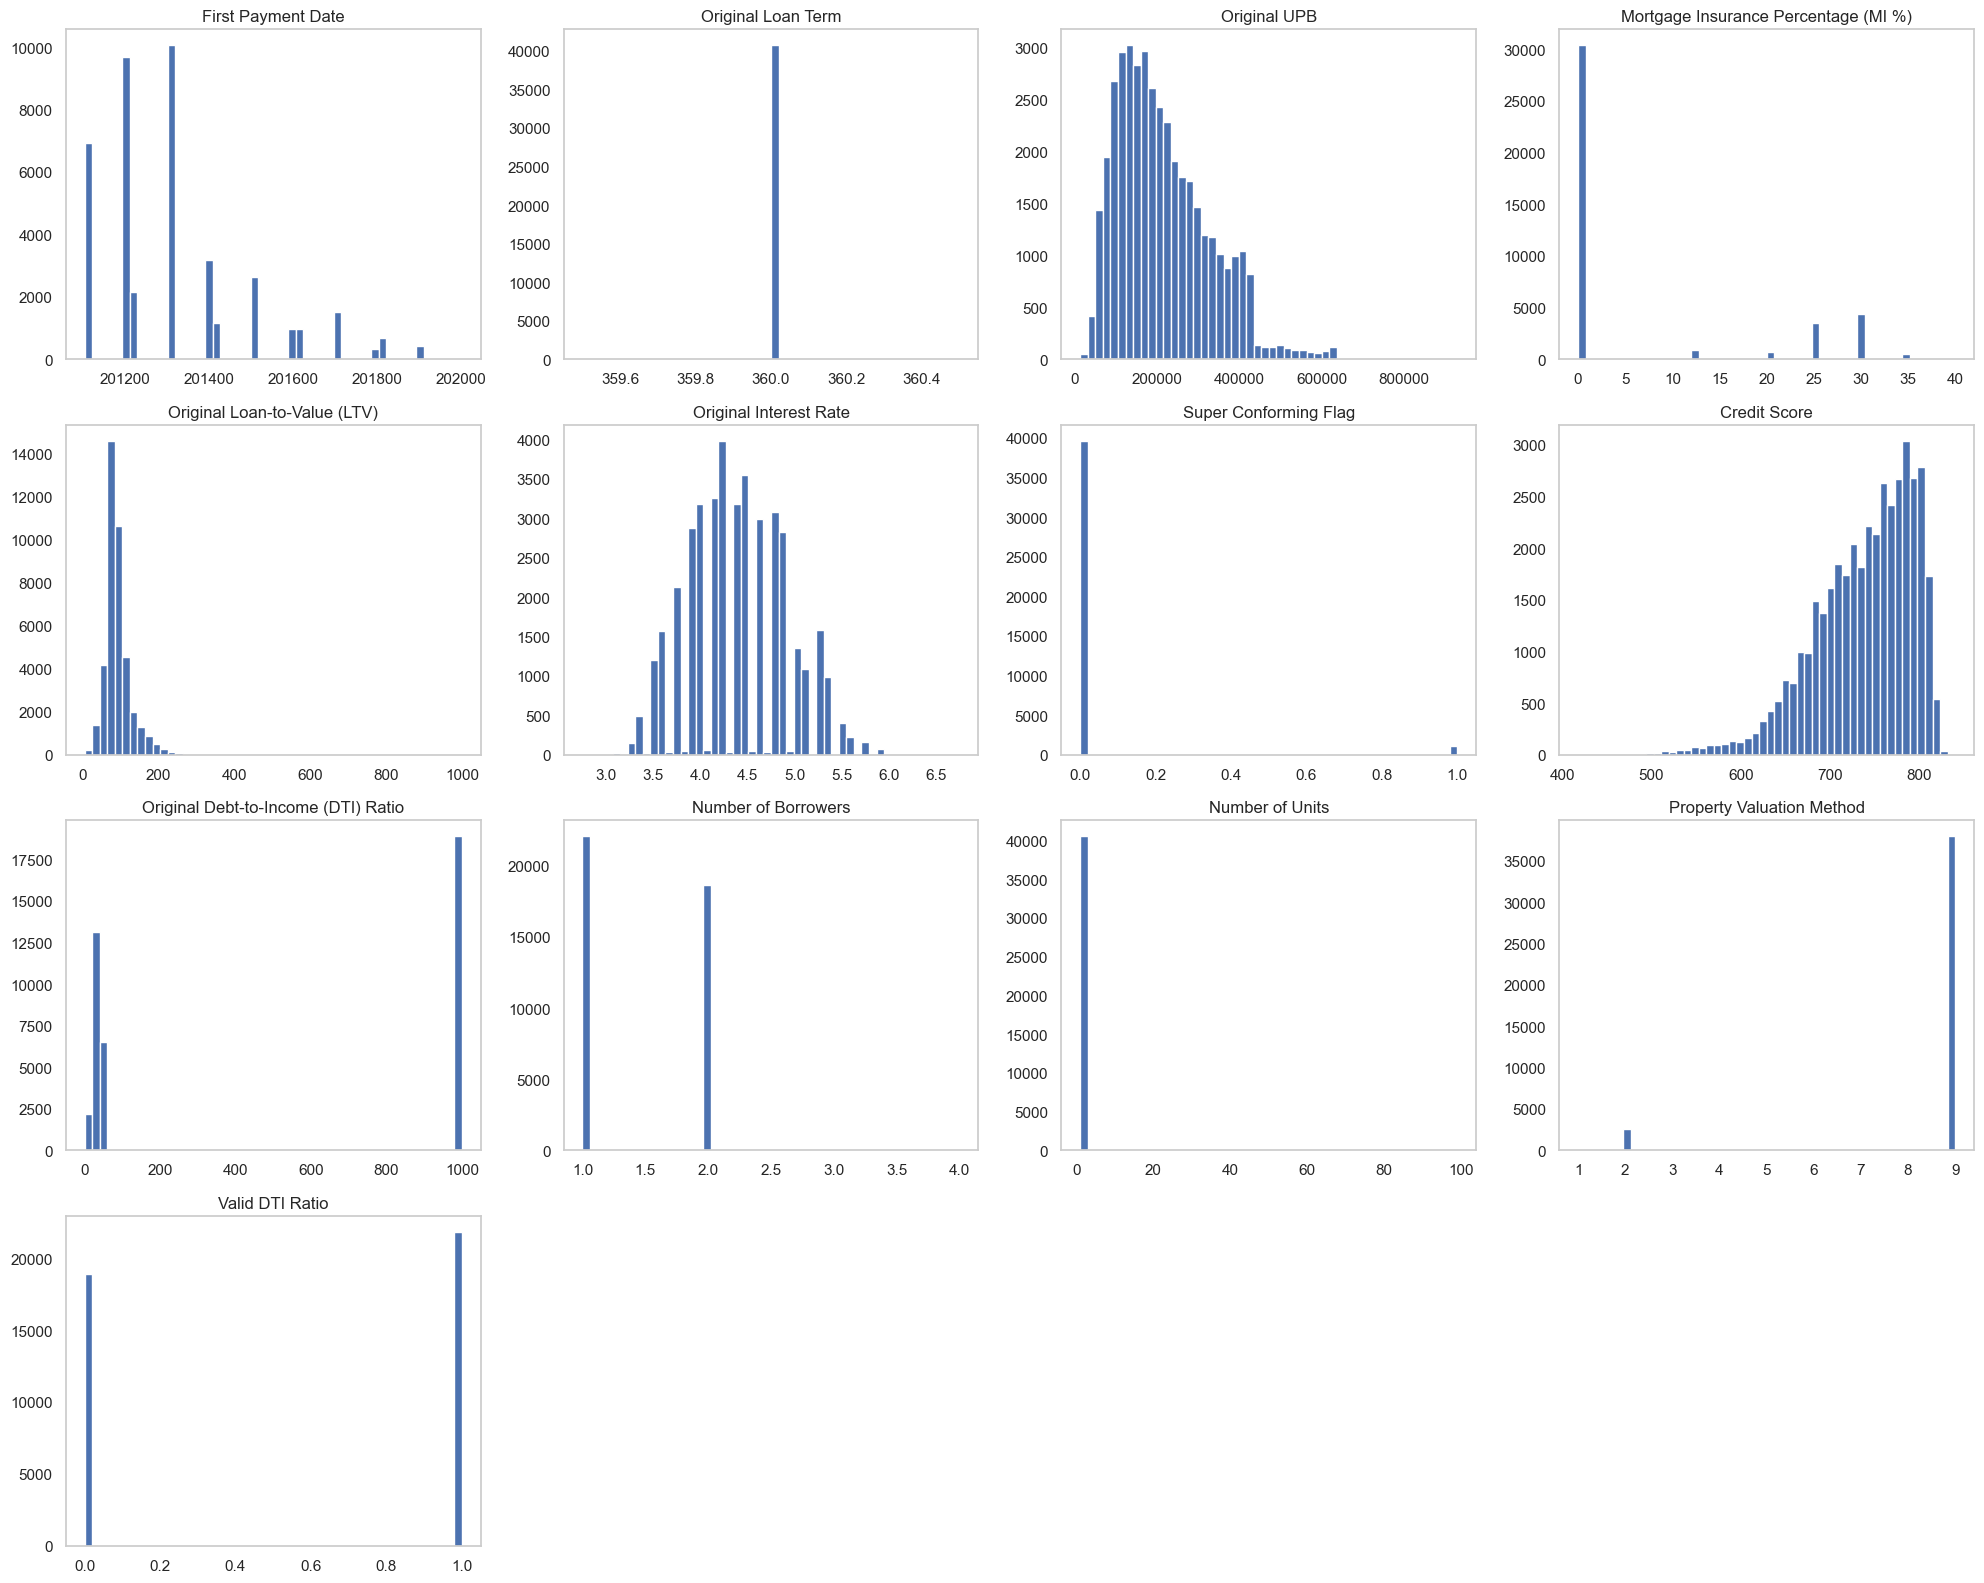

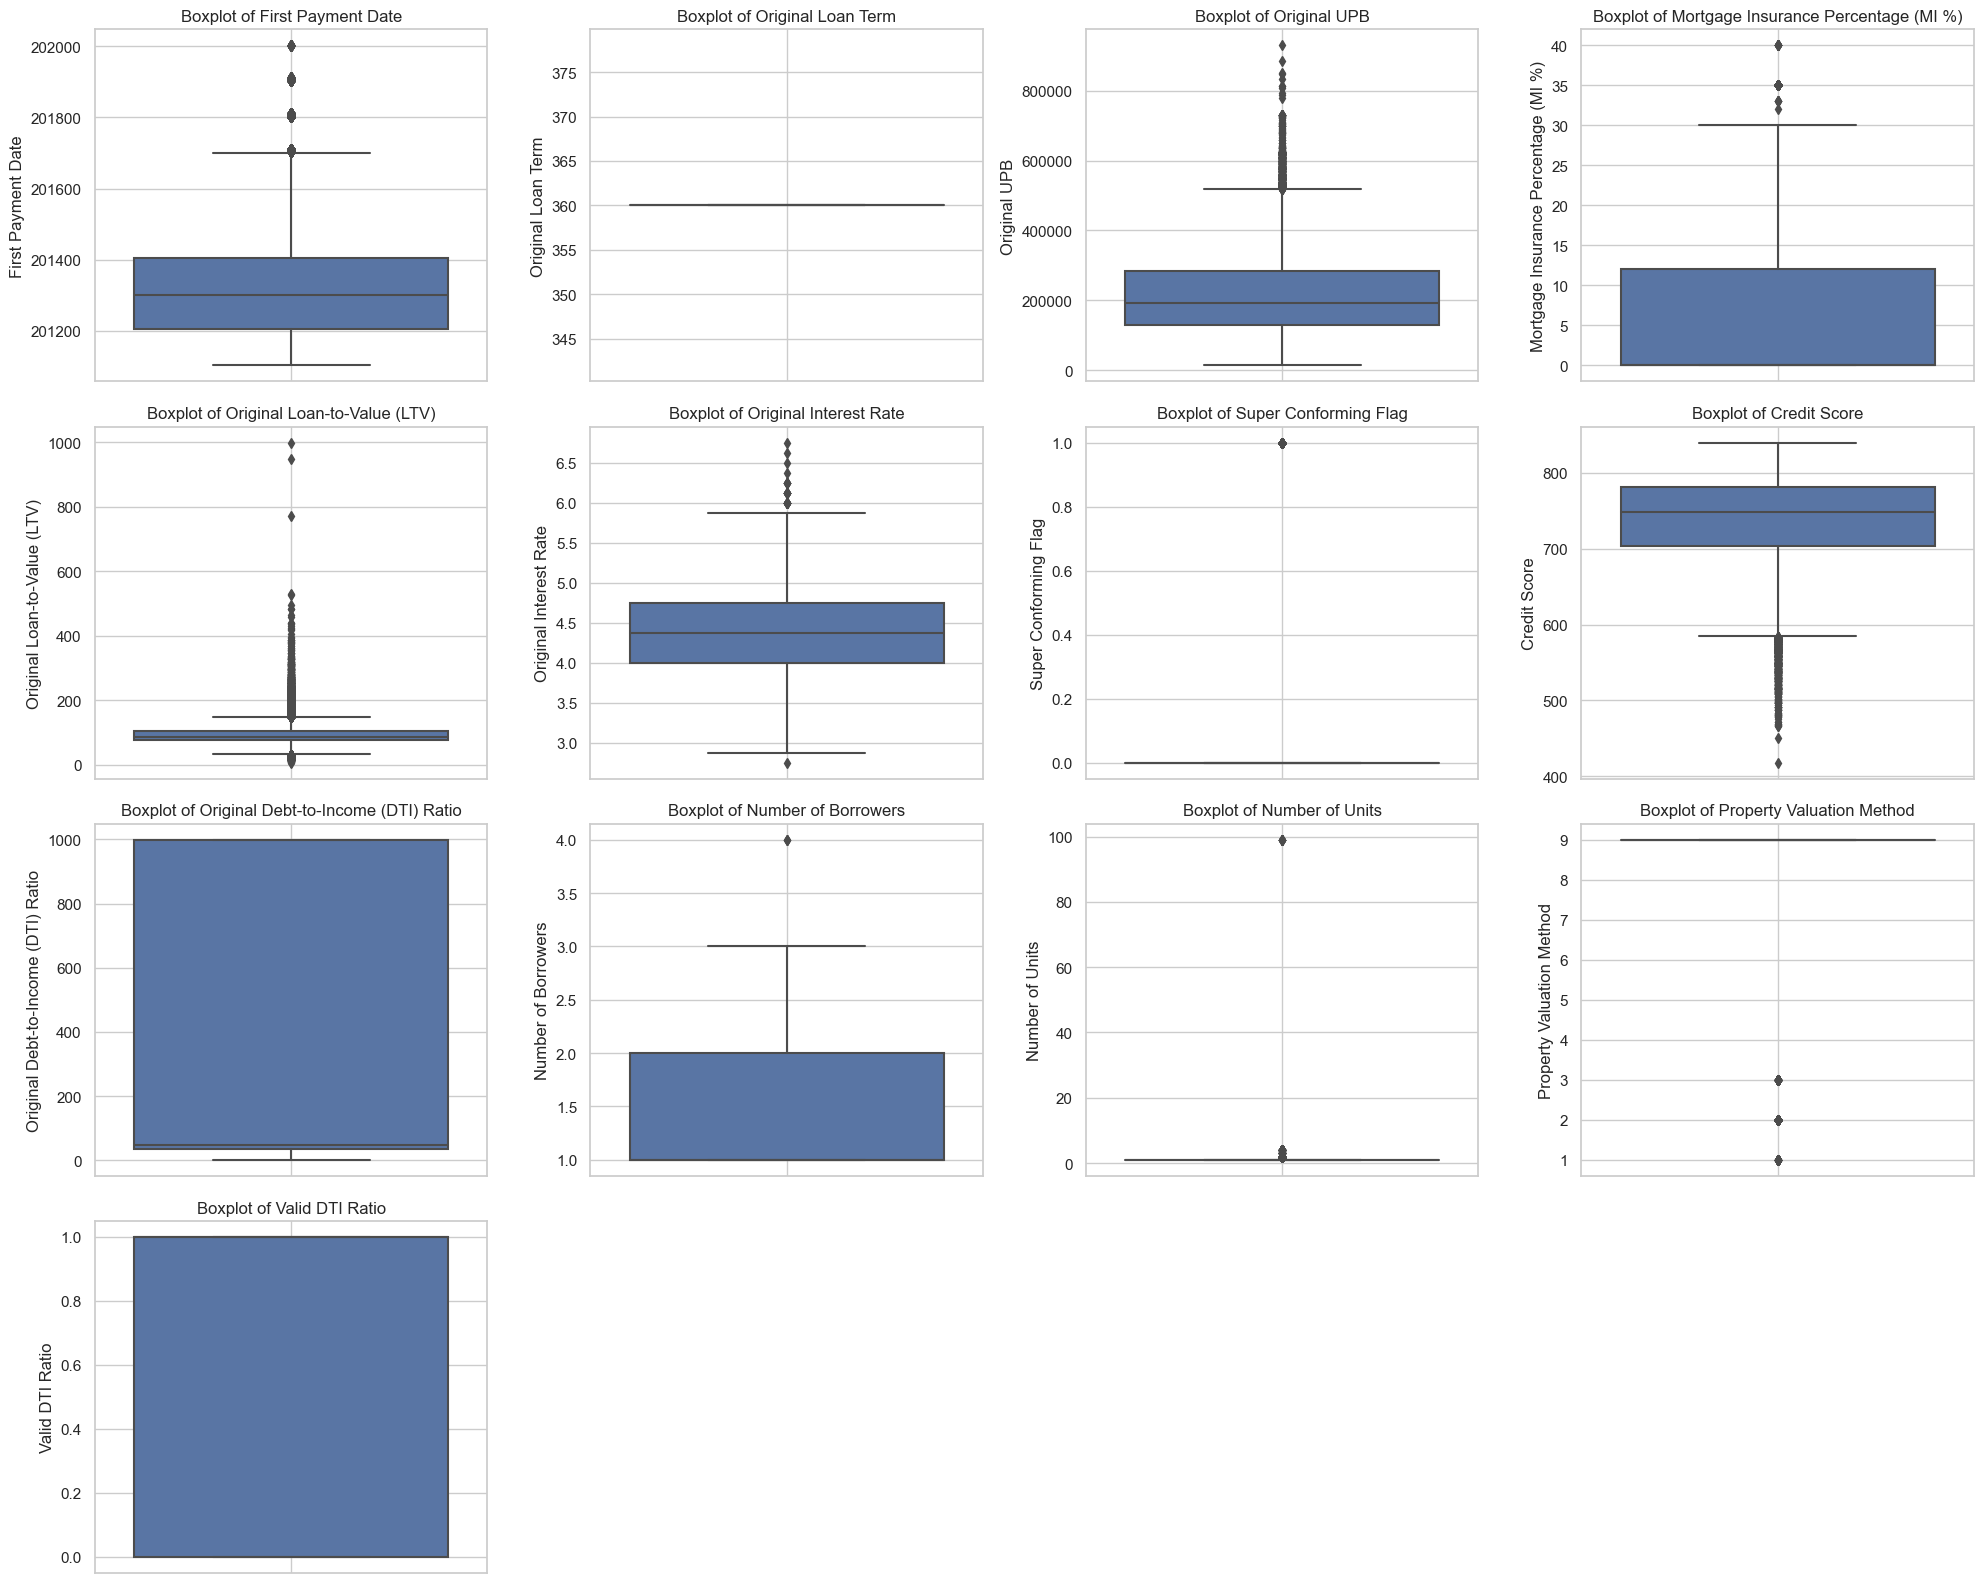

In [10]:
numeric_cols = df_setup.select_dtypes(include=[np.number]).columns.tolist()

# Number of plots per row
plots_per_row = 4
n = len(numeric_cols)
rows = int(np.ceil(n / plots_per_row))
cols = plots_per_row

# Histograms
fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    df_setup[col].hist(ax=axes[idx], bins=50)
    axes[idx].set_title(col)
    axes[idx].grid(False)

# Hide any unused subplots
for idx in range(n, rows * cols):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Boxplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(y=col, data=df_setup, ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {col}')
    axes[idx].grid(True)

# Hide any unused subplots
for idx in range(n, rows * cols):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


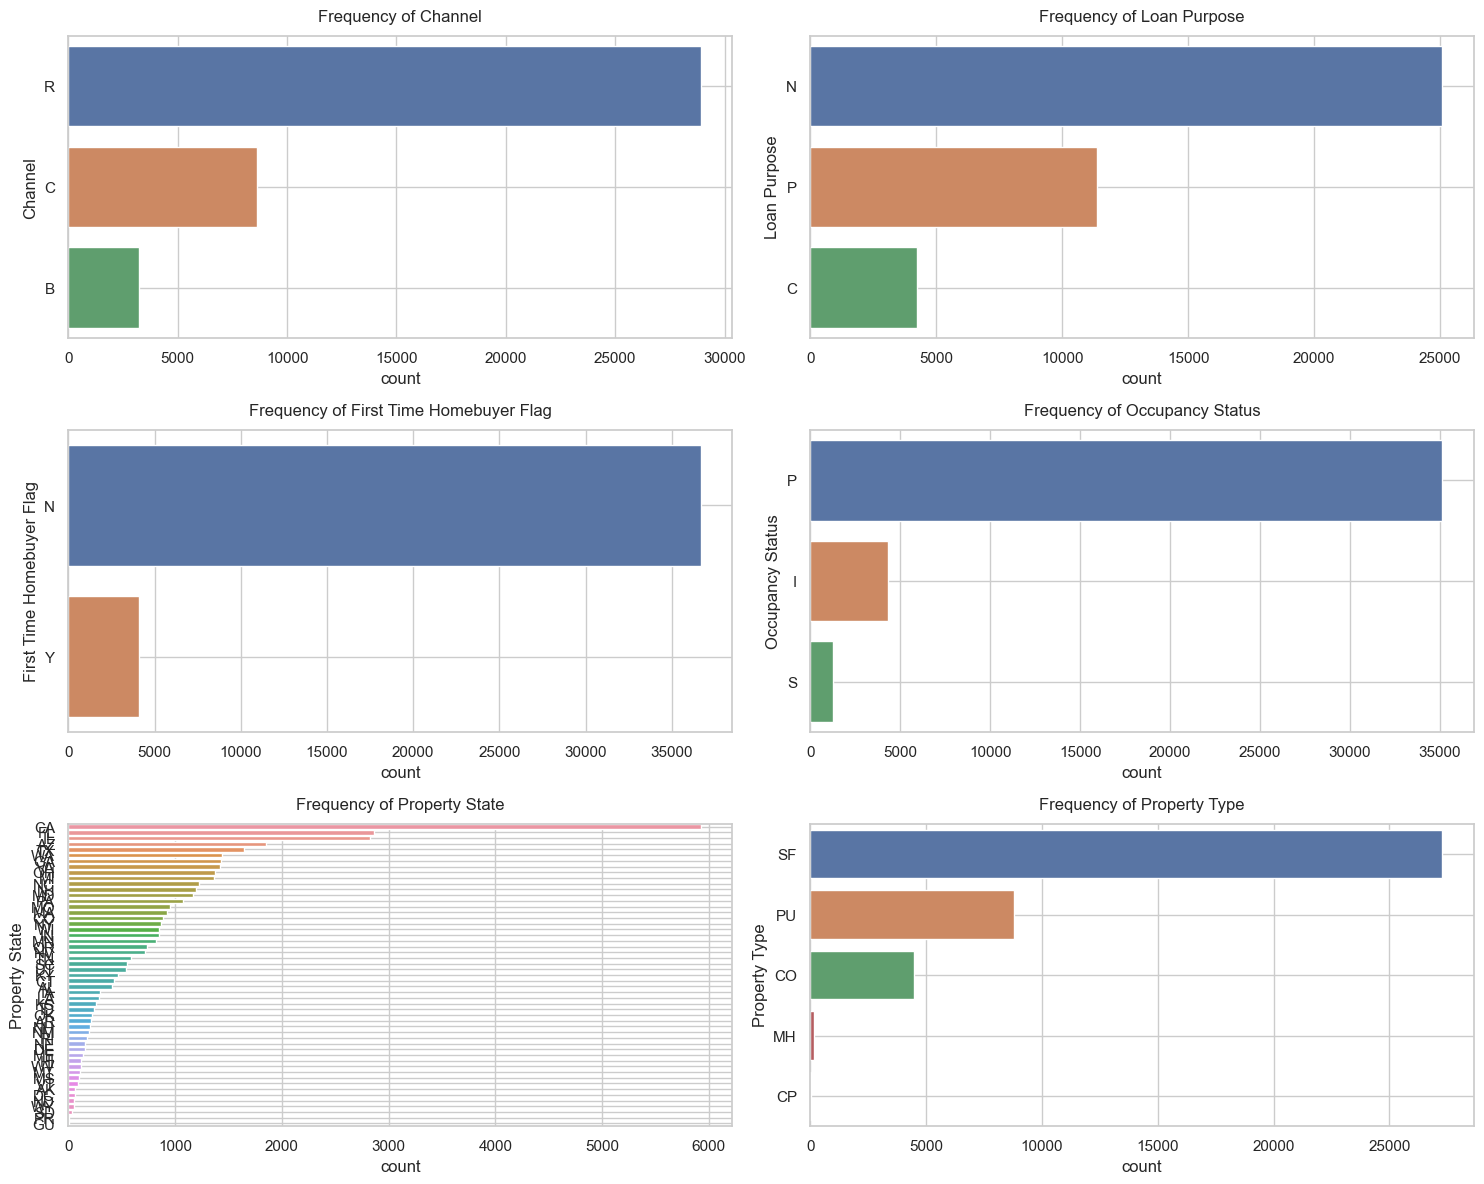

In [11]:
categorical_cols = df_setup.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Loan Sequence Number')  # Exclude 'Loan Sequence Number'

# Determine the layout for subplots
n_cols = 2  # number of columns in subplot layout
n_rows = int(np.ceil(len(categorical_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.ravel()  # Flatten the 2D array for easier iteration

for idx, col in enumerate(categorical_cols):
    sns.countplot(y=col, data=df_setup, ax=axes[idx], order=df_setup[col].value_counts().index)
    axes[idx].set_title(f'Frequency of {col}', y=1.02)  # adjust title position to avoid overlap
    axes[idx].grid(True)

# Remove unused subplots if any
for j in range(idx+1, n_cols*n_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


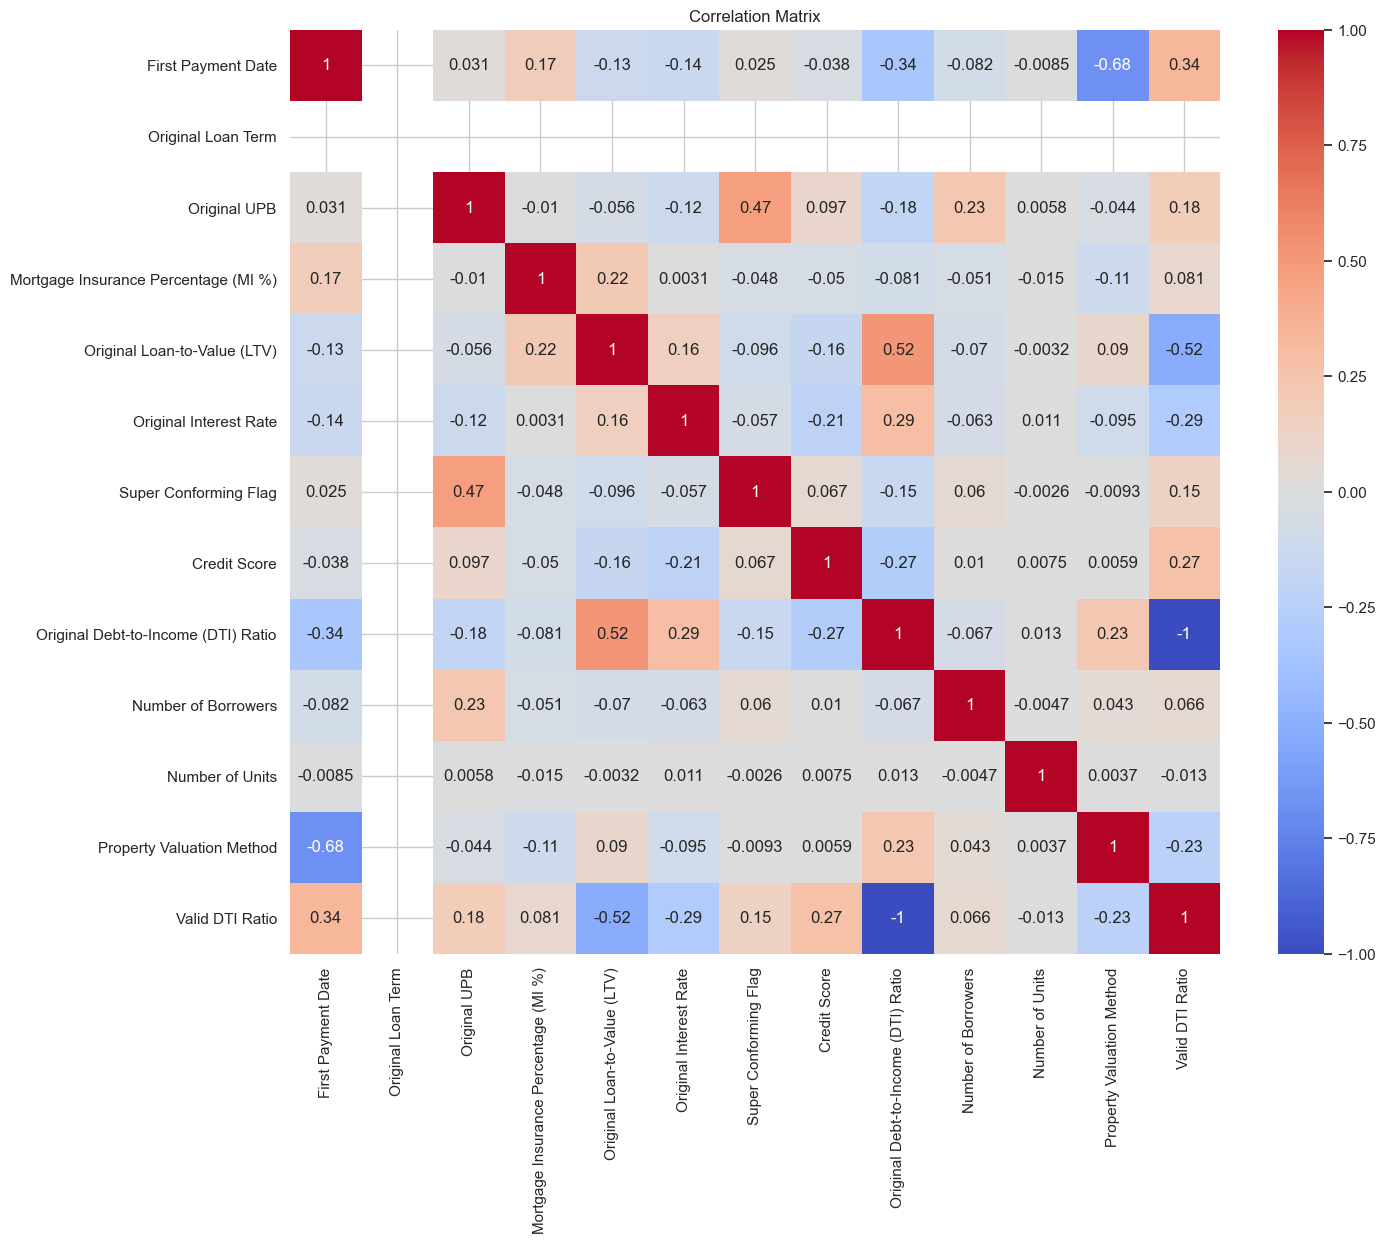

In [12]:
# Select only numeric columns for correlation computation
numeric_cols = df_setup.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns
corr_matrix = numeric_cols.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


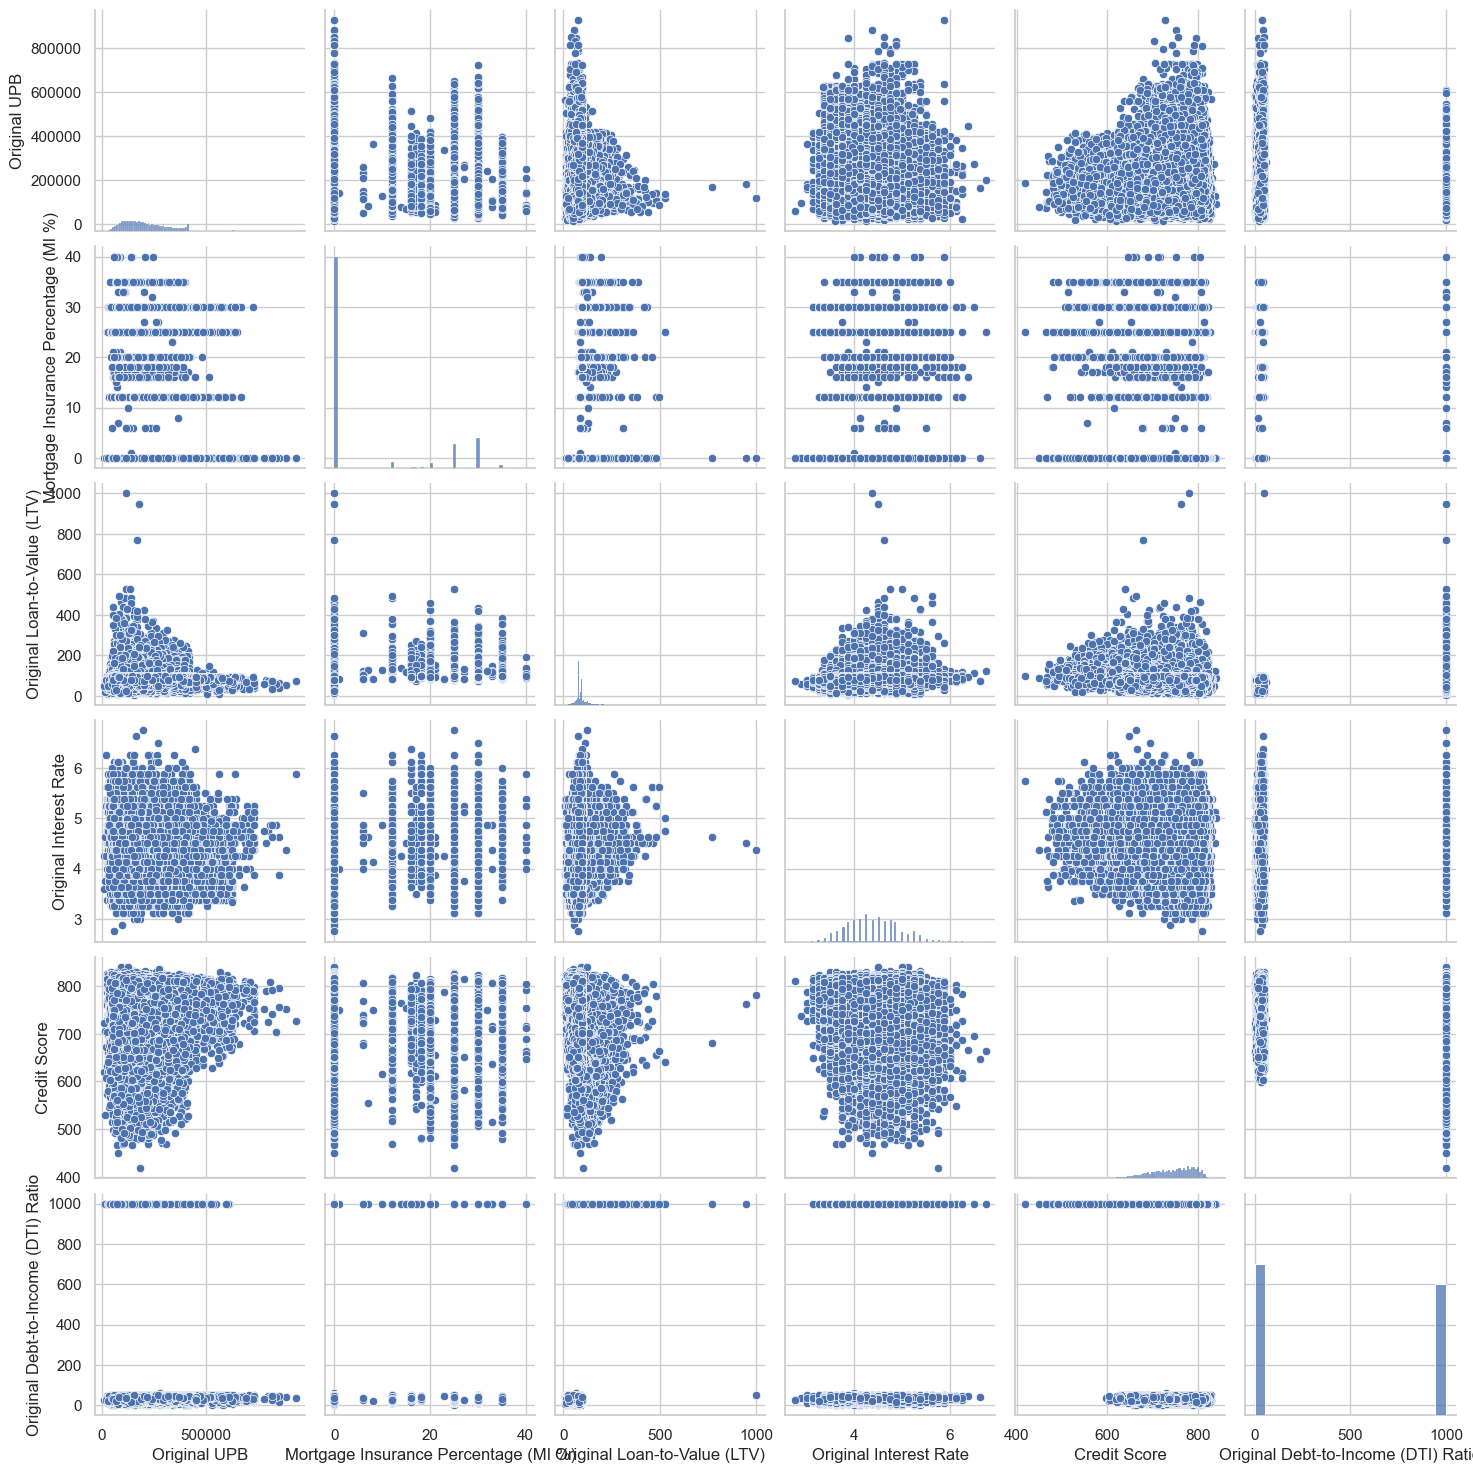

In [13]:
# List of specified columns for the pair plot
selected_cols = [
    'Original UPB',
    'Mortgage Insurance Percentage (MI %)',
    'Original Loan-to-Value (LTV)',
    'Original Interest Rate',
    'Credit Score',
    'Original Debt-to-Income (DTI) Ratio'
]

# Plotting pair plot for the selected columns
sns.pairplot(df_setup[selected_cols])
plt.show()

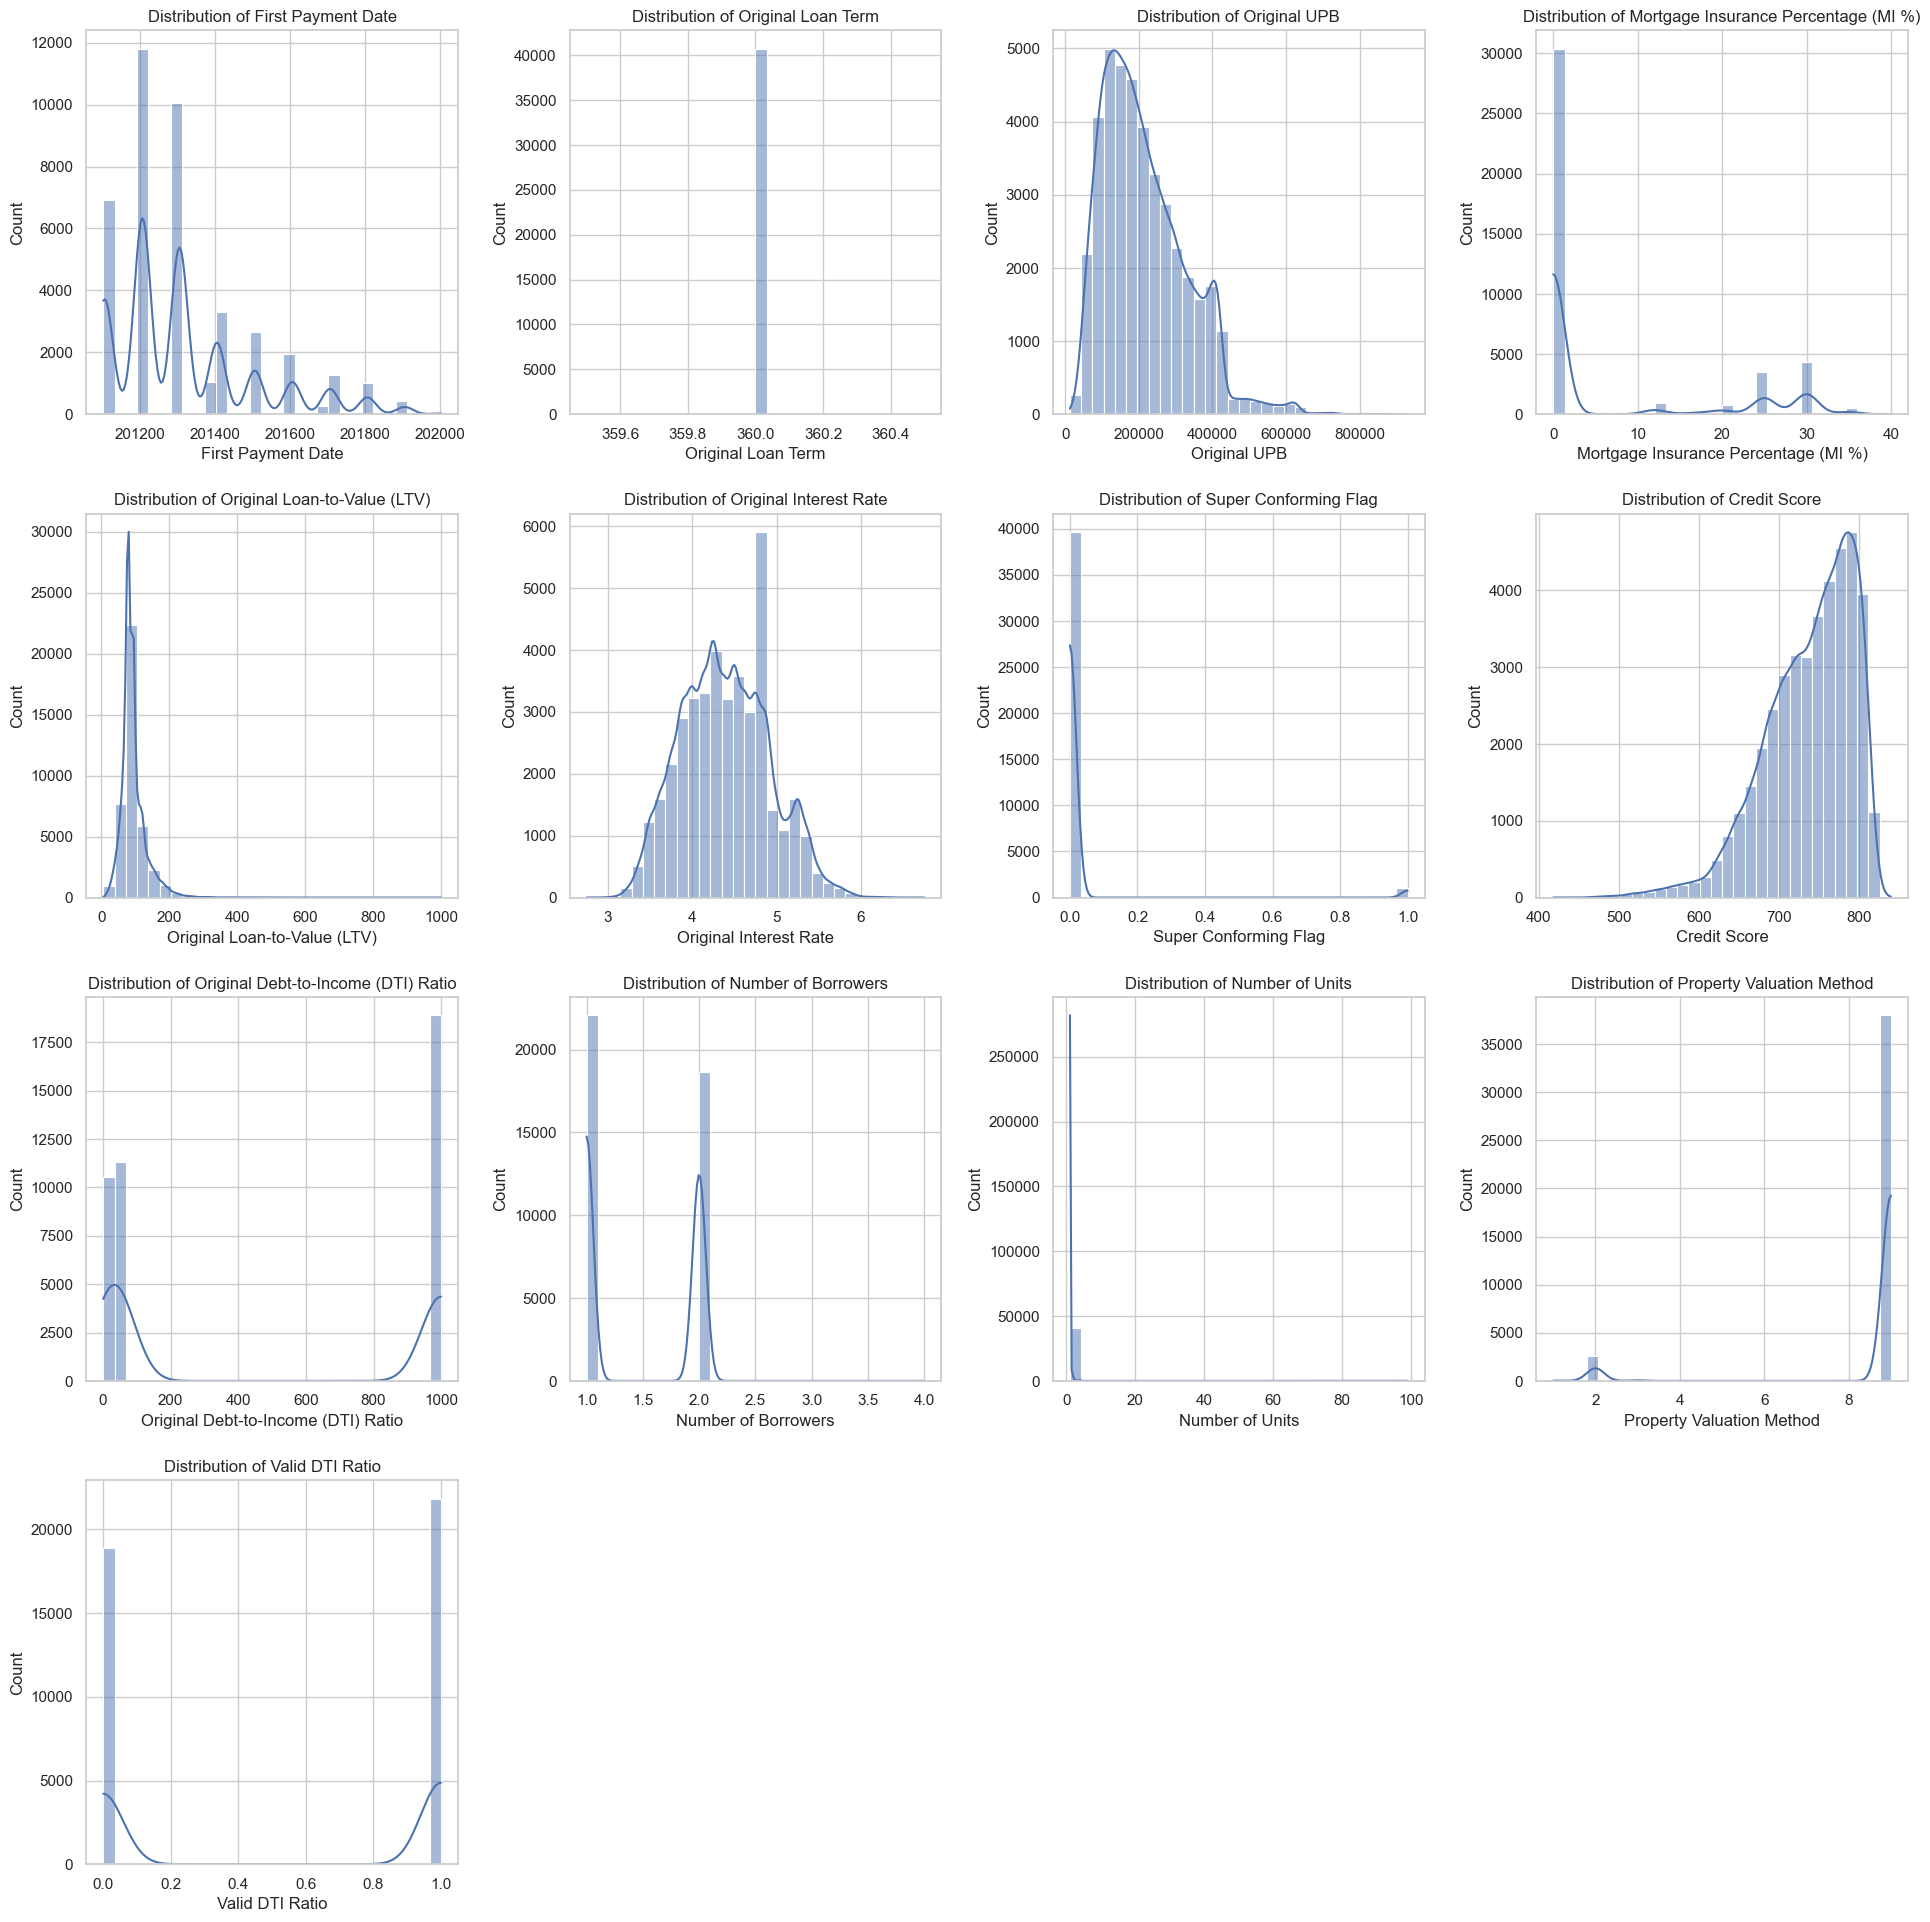

In [14]:
numeric_columns = df_setup.select_dtypes(include=[np.number]).columns

# Determine the grid size: For simplicity, assume a square grid
grid_size = int(np.ceil(np.sqrt(len(numeric_columns))))

# Create a subplot grid
fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(20, 20))

# Adjust the space between plots
plt.tight_layout(pad=4)

# Hide any extra subplots
for ax in axes.ravel()[len(numeric_columns):]:
    ax.axis("off")

# Iterate over columns and axes to plot
for col, ax in zip(numeric_columns, axes.ravel()):
    sns.histplot(df_setup[col], kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_ylabel('Count')

plt.show()

## Loan Monthly Performance Table

In [15]:
display(df_monthly.describe())
df_monthly.info()

,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Current Interest Rate,Delinquency Due to Disaster,Interest Bearing UPB
count,2.014608e+06,2.014608e+06,2.014608e+06,2.014608e+06,2.014608e+06,40741.000000,2.014608e+06,2.014608e+06,2.014608e+06
mean,2.015656e+05,1.918321e+05,1.260669e+00,3.313503e+01,3.268650e+02,1.653617,4.339113e+00,4.239534e-03,1.918321e+05
std,2.516488e+02,1.086742e+05,4.570116e+00,2.605025e+01,2.605025e+01,0.820483,5.301751e-01,6.497356e-02,1.086742e+05
min,2.011020e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.150000e+02,1.000000,2.750000e+00,0.000000e+00,0.000000e+00
25%,2.014020e+05,1.107425e+05,0.000000e+00,1.200000e+01,3.110000e+02,1.000000,3.875000e+00,0.000000e+00,1.107425e+05
50%,2.015100e+05,1.715748e+05,0.000000e+00,2.700000e+01,3.330000e+02,1.000000,4.250000e+00,0.000000e+00,1.715748e+05
75%,2.017120e+05,2.566809e+05,0.000000e+00,4.900000e+01,3.480000e+02,2.000000,4.750000e+00,0.000000e+00,2.566809e+05
max,2.023030e+05,9.300000e+05,1.030000e+02,1.450000e+02,3.600000e+02,3.000000,6.750000e+00,1.000000e+00,9.300000e+05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014608 entries, 0 to 2014607
Data columns (total 10 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   Loan Sequence Number                object 
 1   Monthly Reporting Period            int64  
 2   Current Actual UPB                  float64
 3   Current Loan Delinquency Status     int64  
 4   Loan Age                            float64
 5   Remaining Months to Legal Maturity  float64
 6   Zero Balance Code                   float64
 7   Current Interest Rate               float64
 8   Delinquency Due to Disaster         int64  
 9   Interest Bearing UPB                float64
dtypes: float64(6), int64(3), object(1)
memory usage: 153.7+ MB


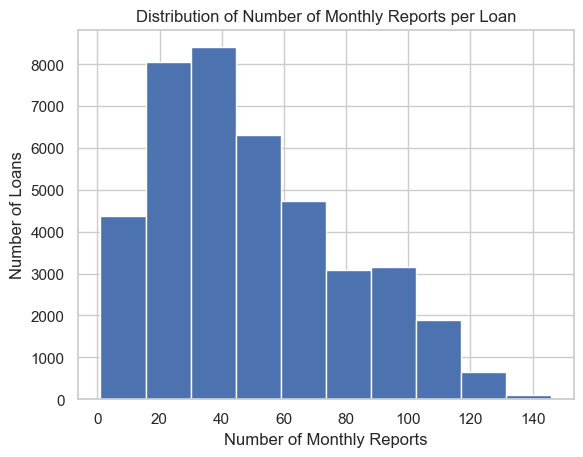

In [16]:
df_monthly['Loan Sequence Number'].value_counts().hist()
plt.title("Distribution of Number of Monthly Reports per Loan")
plt.xlabel("Number of Monthly Reports")
plt.ylabel("Number of Loans")
plt.show()


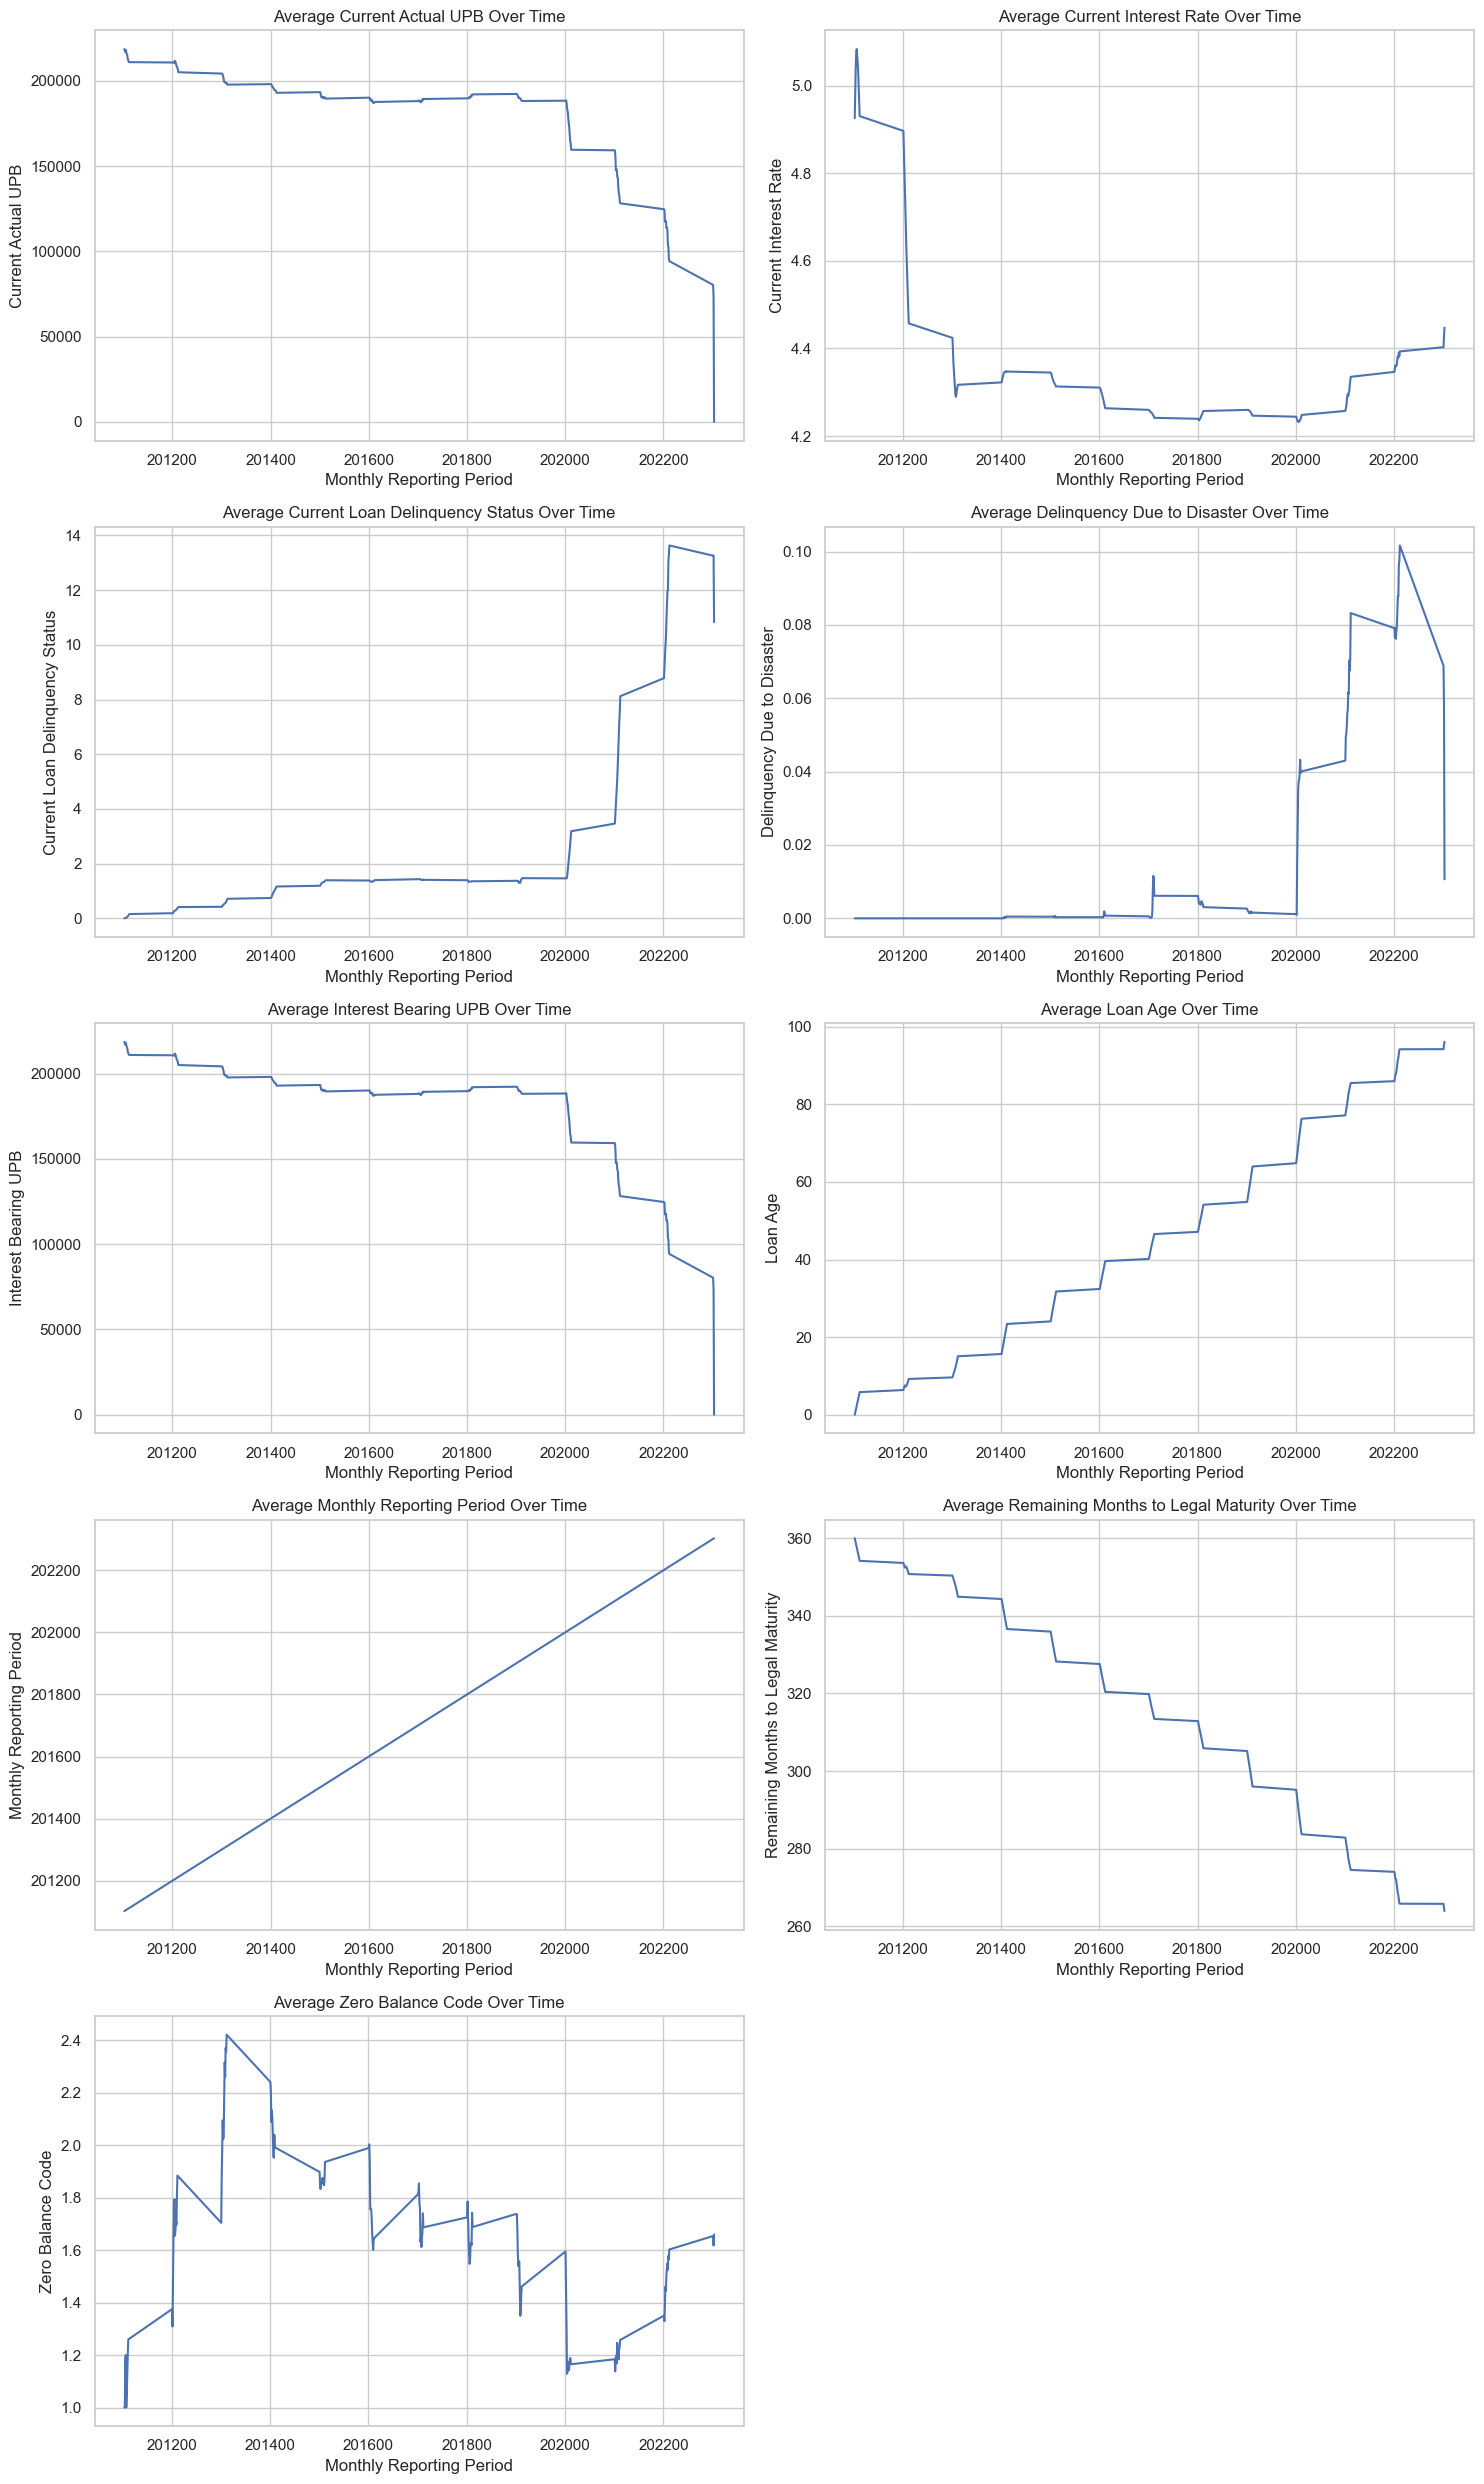

In [17]:
# Exclude 'Loan Sequence Number' and other non-numeric or non-sensible columns
columns_to_aggregate = df_monthly.select_dtypes(include=[np.number]).columns.difference(['Loan Sequence Number'])

# Aggregate by month
monthly_aggregates = df_monthly.groupby('Monthly Reporting Period')[columns_to_aggregate].mean()

# Determine the number of rows and columns for subplots based on the number of valid columns
n_cols = 2
n_rows = len(columns_to_aggregate) // n_cols + (len(columns_to_aggregate) % n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# If there's only one row, ensure that axes is still indexable by [row][col]
if n_rows == 1:
    axes = np.expand_dims(axes, axis=0)

for idx, column in enumerate(columns_to_aggregate):
    row, col = divmod(idx, n_cols)
    axes[row][col].plot(monthly_aggregates.index, monthly_aggregates[column])
    axes[row][col].set_title(f"Average {column} Over Time")
    axes[row][col].set_ylabel(column)
    axes[row][col].set_xlabel('Monthly Reporting Period')

# Remove any empty subplots
for idx in range(len(columns_to_aggregate), n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()

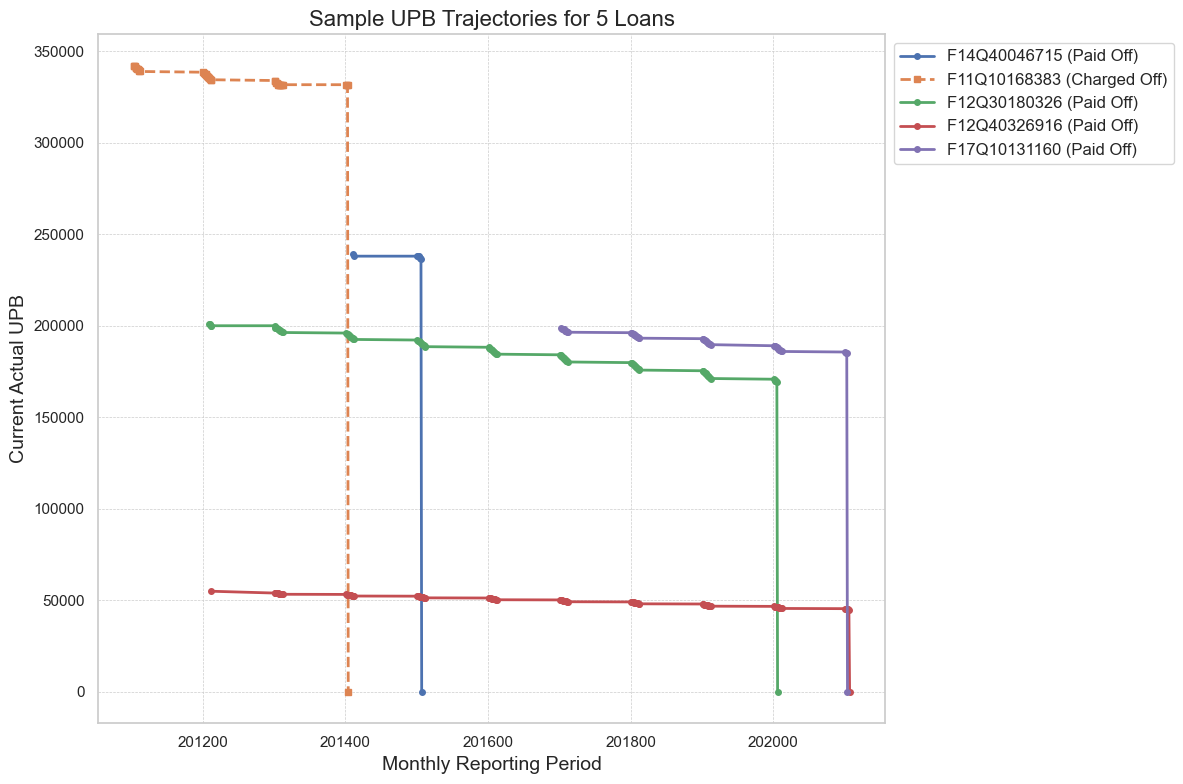

In [18]:
sample_loans = df_monthly['Loan Sequence Number'].sample(5).values

plt.figure(figsize=(12, 8))

for loan in sample_loans:
    subset = df_monthly[df_monthly['Loan Sequence Number'] == loan]
    
    # Determine the end status of the loan
    final_status = subset['Zero Balance Code'].iloc[-1]
    label_suffix = ''
    if final_status == 1:
        marker_style = 'o-'
        label_suffix = ' (Paid Off)'
    elif final_status in [2, 3, 9]:
        marker_style = 's--'
        label_suffix = ' (Charged Off)'
    else:
        marker_style = '^-'
    
    plt.plot(subset['Monthly Reporting Period'], subset['Current Actual UPB'], marker_style, label=loan + label_suffix, markersize=4, linewidth=2)

plt.title("Sample UPB Trajectories for 5 Loans", fontsize=16)
plt.xlabel("Monthly Reporting Period", fontsize=14)
plt.ylabel("Current Actual UPB", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)  # Move the legend to the right side of the plot
plt.tight_layout()

plt.show()


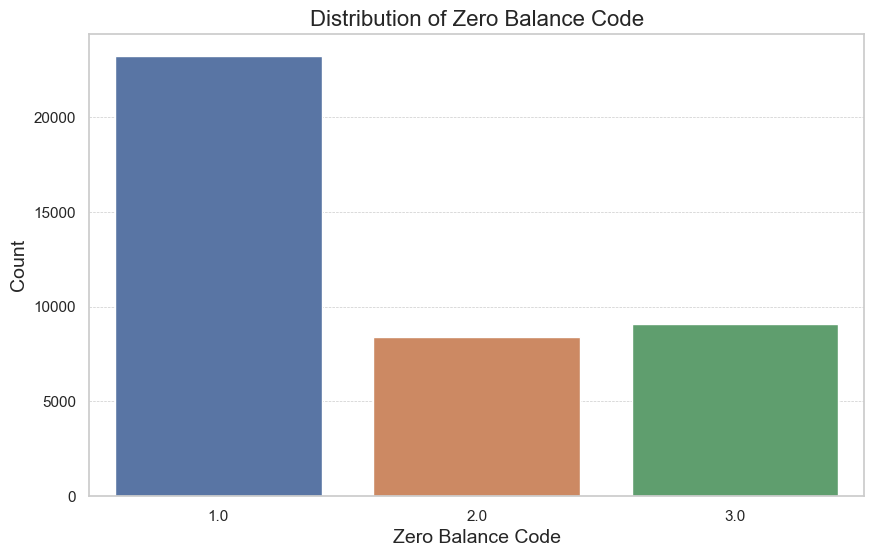

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the distribution of 'Zero Balance Code'
zero_balance_counts = df_monthly['Zero Balance Code'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=zero_balance_counts.index, y=zero_balance_counts.values)

plt.title('Distribution of Zero Balance Code', fontsize=16)
plt.xlabel('Zero Balance Code', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)

plt.show()


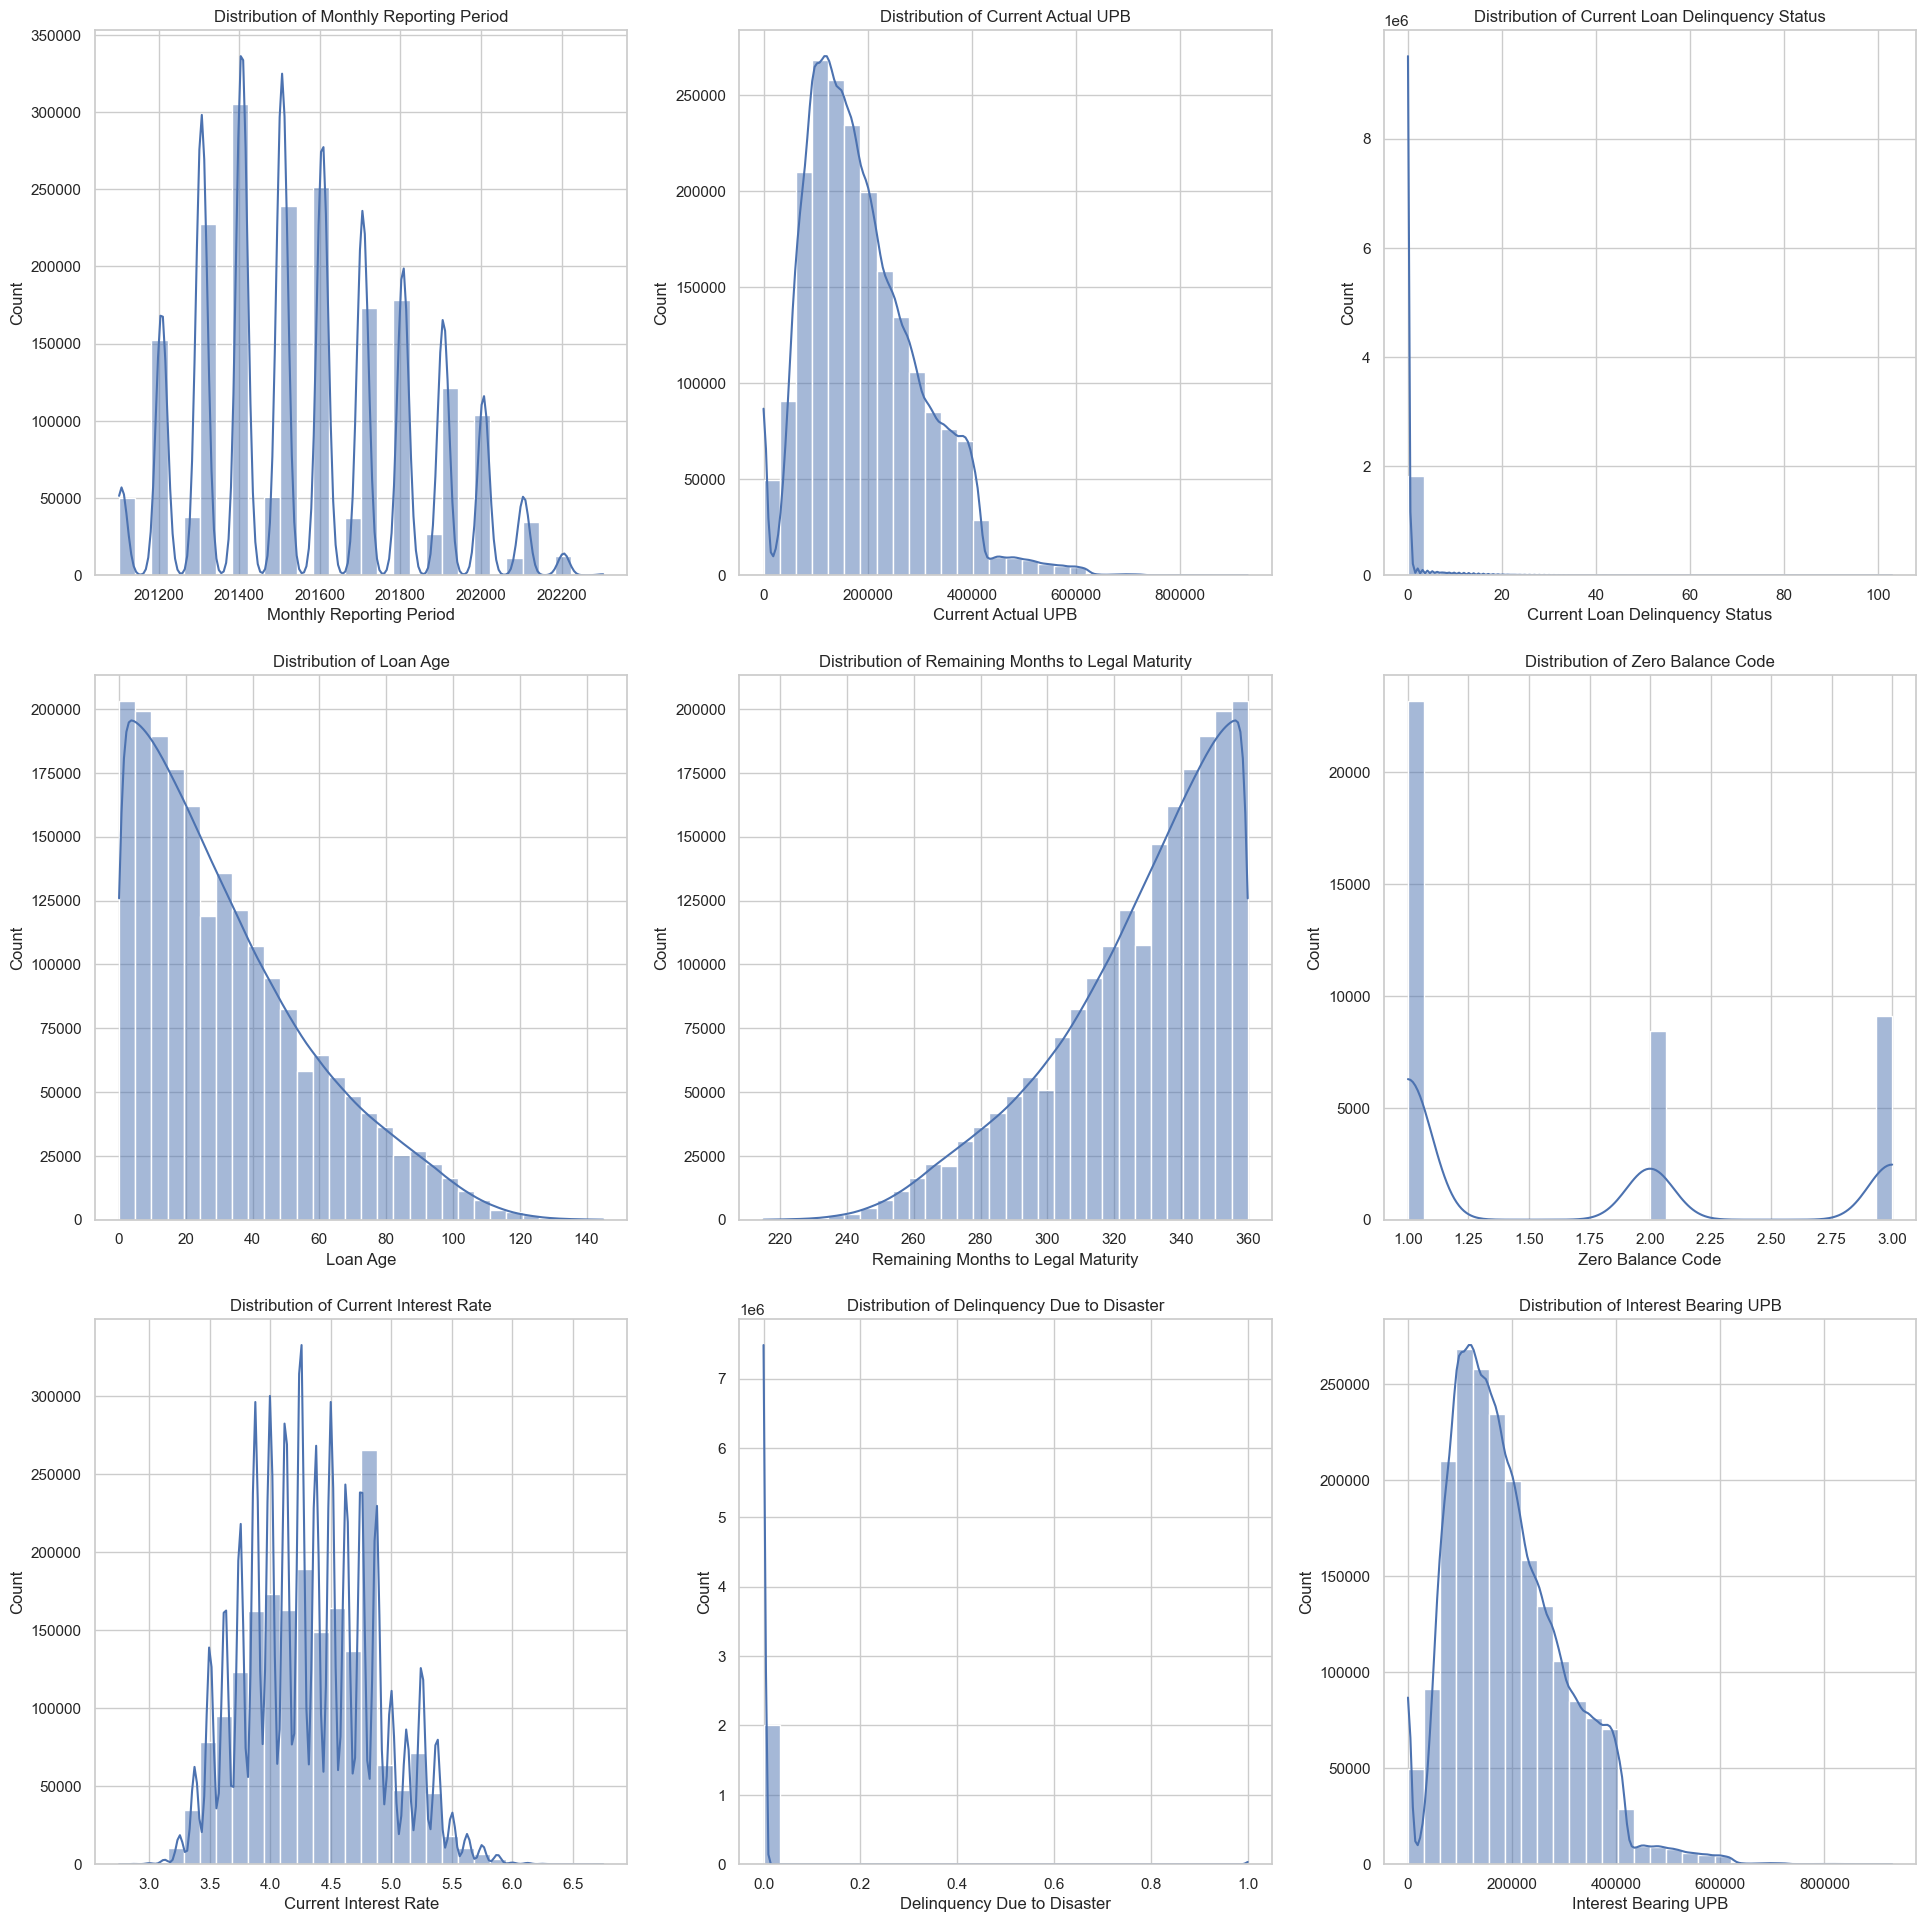

In [20]:
# Assuming df_monthly is already defined and is the DataFrame you're working with
numeric_columns = df_monthly.select_dtypes(include=[np.number]).columns

# Determine the grid size: For simplicity, assume a square grid
grid_size = int(np.ceil(np.sqrt(len(numeric_columns))))

# Create a subplot grid
fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(20, 20))

# Adjust the space between plots
plt.tight_layout(pad=4)

# Hide any extra subplots
for ax in axes.ravel()[len(numeric_columns):]:
    ax.axis("off")

# Iterate over columns and axes to plot
for col, ax in zip(numeric_columns, axes.ravel()):
    sns.histplot(df_monthly[col], kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_ylabel('Count')

plt.show()

In [21]:
df_combined = pd.merge(df_monthly, df_setup, on='Loan Sequence Number')
df_combined = df_combined.sort_values(by=['Loan Sequence Number', 'Loan Age'], ascending=[True, True])
df_combined

,Loan Sequence Number,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Current Interest Rate,Delinquency Due to Disaster,Interest Bearing UPB,First Payment Date,Original Loan Term,Original UPB,Mortgage Insurance Percentage (MI %),Original Loan-to-Value (LTV),Original Interest Rate,Channel,Loan Purpose,Super Conforming Flag,Credit Score,First Time Homebuyer Flag,Original Debt-to-Income (DTI) Ratio,Number of Borrowers,Number of Units,Occupancy Status,Property State,Property Type,Property Valuation Method,Valid DTI Ratio
0,F11Q10000044,201102,135000.00,0,0.0,360.0,NaN,4.625,0,135000.00,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1
1,F11Q10000044,201103,135000.00,0,1.0,359.0,NaN,4.625,0,135000.00,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1
2,F11Q10000044,201104,135000.00,0,2.0,358.0,NaN,4.625,0,135000.00,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1
3,F11Q10000044,201105,134000.00,0,3.0,357.0,NaN,4.625,0,134000.00,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1
4,F11Q10000044,201106,134000.00,0,4.0,356.0,NaN,4.625,0,134000.00,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014603,F19Q40515256,202211,115037.14,16,34.0,326.0,NaN,4.125,0,115037.14,202002,360.0,118000.0,0.0,23.0,4.125,C,P,0,771.0,N,38.0,2.0,1.0,I,CA,SF,2.0,1
2014604,F19Q40515256,202212,115037.14,17,35.0,325.0,NaN,4.125,0,115037.14,202002,360.0,118000.0,0.0,23.0,4.125,C,P,0,771.0,N,38.0,2.0,1.0,I,CA,SF,2.0,1
2014605,F19Q40515256,202301,115037.14,18,36.0,324.0,NaN,4.125,0,115037.14,202002,360.0,118000.0,0.0,23.0,4.125,C,P,0,771.0,N,38.0,2.0,1.0,I,CA,SF,2.0,1
2014606,F19Q40515256,202302,115037.14,19,37.0,323.0,NaN,4.125,0,115037.14,202002,360.0,118000.0,0.0,23.0,4.125,C,P,0,771.0,N,38.0,2.0,1.0,I,CA,SF,2.0,1


### Create a new adj_time column that is one month earlier than the reported period.

In [22]:
# Convert 'Monthly Reporting Period' to datetime
df_combined['Monthly Reporting Period'] = pd.to_datetime(df_combined['Monthly Reporting Period'], format='%Y%m')

# Subtract one month
df_combined['adj_time'] = df_combined['Monthly Reporting Period'] - pd.DateOffset(months=1)

# Convert 'adj_time' back to the original format YYYYMM
df_combined['adj_time'] = df_combined['adj_time'].dt.strftime('%Y%m')
df_combined

,Loan Sequence Number,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Current Interest Rate,Delinquency Due to Disaster,Interest Bearing UPB,First Payment Date,Original Loan Term,Original UPB,Mortgage Insurance Percentage (MI %),Original Loan-to-Value (LTV),Original Interest Rate,Channel,Loan Purpose,Super Conforming Flag,Credit Score,First Time Homebuyer Flag,Original Debt-to-Income (DTI) Ratio,Number of Borrowers,Number of Units,Occupancy Status,Property State,Property Type,Property Valuation Method,Valid DTI Ratio,adj_time
0,F11Q10000044,2011-02-01,135000.00,0,0.0,360.0,NaN,4.625,0,135000.00,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201101
1,F11Q10000044,2011-03-01,135000.00,0,1.0,359.0,NaN,4.625,0,135000.00,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201102
2,F11Q10000044,2011-04-01,135000.00,0,2.0,358.0,NaN,4.625,0,135000.00,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201103
3,F11Q10000044,2011-05-01,134000.00,0,3.0,357.0,NaN,4.625,0,134000.00,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201104
4,F11Q10000044,2011-06-01,134000.00,0,4.0,356.0,NaN,4.625,0,134000.00,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014603,F19Q40515256,2022-11-01,115037.14,16,34.0,326.0,NaN,4.125,0,115037.14,202002,360.0,118000.0,0.0,23.0,4.125,C,P,0,771.0,N,38.0,2.0,1.0,I,CA,SF,2.0,1,202210
2014604,F19Q40515256,2022-12-01,115037.14,17,35.0,325.0,NaN,4.125,0,115037.14,202002,360.0,118000.0,0.0,23.0,4.125,C,P,0,771.0,N,38.0,2.0,1.0,I,CA,SF,2.0,1,202211
2014605,F19Q40515256,2023-01-01,115037.14,18,36.0,324.0,NaN,4.125,0,115037.14,202002,360.0,118000.0,0.0,23.0,4.125,C,P,0,771.0,N,38.0,2.0,1.0,I,CA,SF,2.0,1,202212
2014606,F19Q40515256,2023-02-01,115037.14,19,37.0,323.0,NaN,4.125,0,115037.14,202002,360.0,118000.0,0.0,23.0,4.125,C,P,0,771.0,N,38.0,2.0,1.0,I,CA,SF,2.0,1,202301


# Import & Merge Economic Indicator

## Housing Price index

In [23]:
df_housing_price = pd.read_csv('/Users/miracles/Desktop/practicum/Reference data/fmhpi_master_file.csv')
df_housing_price

,Year,Month,GEO_Type,GEO_Name,GEO_Code,Index_NSA,Index_SA
0,1975,1,State,AK,.,34.332844,34.534399
1,1975,2,State,AK,.,34.896796,35.063040
2,1975,3,State,AK,.,35.472741,35.520850
3,1975,4,State,AK,.,36.065779,35.957562
4,1975,5,State,AK,.,36.707256,36.418835
...,...,...,...,...,...,...,...
254619,2023,4,CBSA,Yuma AZ,49740,265.541309,263.763348
254620,2023,5,CBSA,Yuma AZ,49740,269.265234,266.508275
254621,2023,6,CBSA,Yuma AZ,49740,272.605000,268.852882
254622,2023,7,CBSA,Yuma AZ,49740,276.140017,271.406851


In [24]:
# Get unique values from both columns
codes_in_housing_price = set(df_housing_price[df_housing_price['GEO_Type'] == 'State']['GEO_Name'].unique())
codes_in_setup = set(df_setup['Property State'].unique())

# Find the difference
codes_in_setup_not_in_housing_price = codes_in_setup - codes_in_housing_price

# Print the unique values that are in df_setup but not in df_housing_price
print(f"Codes in 'df_setup' but not in 'df_housing_price': {codes_in_setup_not_in_housing_price}")

# Find the difference
codes_in_housing_price_not_in_setup = codes_in_housing_price - codes_in_setup

# Print the unique values that are in df_housing_price but not in df_setup
print(f"Codes in 'df_housing_price' but not in 'df_setup': {codes_in_housing_price_not_in_setup}")

Codes in 'df_setup' but not in 'df_housing_price': {'GU', 'PR'}
Codes in 'df_housing_price' but not in 'df_setup': set()


### Merge

In [25]:
# Step 1: Split 'adj_time' into 'year' and 'month'
df_combined['adj_year'] = df_combined['adj_time'].str[:4].astype(int)
df_combined['adj_month'] = df_combined['adj_time'].str[4:].astype(int)

# Step 2: Filter 'df_housing_price' to include only rows where 'GEO_Type' is 'State'
df_housing_price_state = df_housing_price[df_housing_price['GEO_Type'] == 'State']

# Step 3: Merge 'df_combined' with 'df_housing_price_state'
df_merged = pd.merge(
    df_combined,
    df_housing_price_state[['Year', 'Month', 'GEO_Name', 'Index_SA']],
    left_on=['adj_year', 'adj_month', 'Property State'],
    right_on=['Year', 'Month', 'GEO_Name'],
    how='left'
)

# Step 4: Drop the 'Year' and 'Month' columns from 'df_housing_price' if you don't need them
df_merged.drop(columns=['Year', 'Month','GEO_Name'], inplace=True)

# Step 5: Determine the count of matched and unmatched rows
matched_rows = df_merged['Index_SA'].notnull().sum()
unmatched_rows = df_merged['Index_SA'].isnull().sum()

print(f"Number of matched rows: {matched_rows}")
print(f"Number of unmatched rows: {unmatched_rows}")

df_merged = df_merged.rename(columns = {'Index_SA':'Housing Price'})

# df_unmatched = df_merged[df_merged['GEO_Name'].isnull()]
# df_matched = df_merged[df_merged['GEO_Name'].notnull()]

Number of matched rows: 2014018
Number of unmatched rows: 590


In [26]:
df_merged.head()

,Loan Sequence Number,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Current Interest Rate,Delinquency Due to Disaster,Interest Bearing UPB,First Payment Date,Original Loan Term,Original UPB,Mortgage Insurance Percentage (MI %),Original Loan-to-Value (LTV),Original Interest Rate,Channel,Loan Purpose,Super Conforming Flag,Credit Score,First Time Homebuyer Flag,Original Debt-to-Income (DTI) Ratio,Number of Borrowers,Number of Units,Occupancy Status,Property State,Property Type,Property Valuation Method,Valid DTI Ratio,adj_time,adj_year,adj_month,Housing Price
0,F11Q10000044,2011-02-01,135000.0,0,0.0,360.0,NaN,4.625,0,135000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201101,2011,1,127.545095
1,F11Q10000044,2011-03-01,135000.0,0,1.0,359.0,NaN,4.625,0,135000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201102,2011,2,127.276039
2,F11Q10000044,2011-04-01,135000.0,0,2.0,358.0,NaN,4.625,0,135000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201103,2011,3,126.871005
3,F11Q10000044,2011-05-01,134000.0,0,3.0,357.0,NaN,4.625,0,134000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201104,2011,4,126.464664
4,F11Q10000044,2011-06-01,134000.0,0,4.0,356.0,NaN,4.625,0,134000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201105,2011,5,125.976994


## CPI

In [27]:
df_cpi = pd.read_csv('/Users/miracles/Desktop/practicum/Reference data/cpi.csv')
df_cpi = df_cpi.rename(columns = {'CORESTICKM159SFRBATL' : 'CPI'})
df_cpi 

,DATE,CPI
0,1967-12-01,3.383497
1,1968-01-01,3.659987
2,1968-02-01,3.682012
3,1968-03-01,4.151668
4,1968-04-01,4.165427
...,...,...
664,2023-04-01,6.322749
665,2023-05-01,6.000606
666,2023-06-01,5.626529
667,2023-07-01,5.456089


### Merge

In [28]:
# Convert the 'DATE' column to datetime if it's not already
df_cpi['DATE'] = pd.to_datetime(df_cpi['DATE'])

# Create 'year' and 'month' columns in df_cpi for merging
df_cpi['year'] = df_cpi['DATE'].dt.year
df_cpi['month'] = df_cpi['DATE'].dt.month

# Now perform the merge with df_merged on 'year' and 'month' columns
# Remember that 'adj_time' in df_merged corresponds to 'year' and 'month' of df_cpi
df_merged = pd.merge(df_merged, df_cpi, left_on=['adj_year', 'adj_month'], right_on=['year', 'month'], how='left')
df_merged.drop(columns=['DATE', 'year', 'month'], inplace=True)

# After the merge, count the number of matched and unmatched rows
matched_rows = df_merged['CPI'].notnull().sum()
unmatched_rows = df_merged['CPI'].isnull().sum()

print(f"Number of matched rows: {matched_rows}")
print(f"Number of unmatched rows: {unmatched_rows}")

Number of matched rows: 2014608
Number of unmatched rows: 0


In [29]:
df_merged.head()

,Loan Sequence Number,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Current Interest Rate,Delinquency Due to Disaster,Interest Bearing UPB,First Payment Date,Original Loan Term,Original UPB,Mortgage Insurance Percentage (MI %),Original Loan-to-Value (LTV),Original Interest Rate,Channel,Loan Purpose,Super Conforming Flag,Credit Score,First Time Homebuyer Flag,Original Debt-to-Income (DTI) Ratio,Number of Borrowers,Number of Units,Occupancy Status,Property State,Property Type,Property Valuation Method,Valid DTI Ratio,adj_time,adj_year,adj_month,Housing Price,CPI
0,F11Q10000044,2011-02-01,135000.0,0,0.0,360.0,NaN,4.625,0,135000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201101,2011,1,127.545095,0.960037
1,F11Q10000044,2011-03-01,135000.0,0,1.0,359.0,NaN,4.625,0,135000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201102,2011,2,127.276039,1.123882
2,F11Q10000044,2011-04-01,135000.0,0,2.0,358.0,NaN,4.625,0,135000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201103,2011,3,126.871005,1.186101
3,F11Q10000044,2011-05-01,134000.0,0,3.0,357.0,NaN,4.625,0,134000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201104,2011,4,126.464664,1.215550
4,F11Q10000044,2011-06-01,134000.0,0,4.0,356.0,NaN,4.625,0,134000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201105,2011,5,125.976994,1.261395


## Unemployment Rate

In [30]:
df_unemployment_state = pd.read_excel('/Users/miracles/Desktop/practicum/Reference data/ststdsadata.xlsx')
df_unemployment_state

,FIPS Code,State and area,Year,Month,Population,Total,Percent of population,Total Employment,Percent of Employment,Total Unemployed,Percent of Unemployment
0,1,Alabama,1976,1,2605000,1484555,57.0,1386023,53.2,98532,6.6
1,2,Alaska,1976,1,232000,160183,69.0,148820,64.1,11363,7.1
2,4,Arizona,1976,1,1621000,964120,59.5,865871,53.4,98249,10.2
3,5,Arkansas,1976,1,1536000,889044,57.9,824395,53.7,64649,7.3
4,6,California,1976,1,15621000,9774280,62.6,8875685,56.8,898595,9.2
...,...,...,...,...,...,...,...,...,...,...,...
30311,51,Virginia,2023,8,6894942,4601469,66.7,4488510,65.1,112959,2.5
30312,53,Washington,2023,8,6295072,4067293,64.6,3921175,62.3,146118,3.6
30313,54,West Virginia,2023,8,1433076,786432,54.9,758168,52.9,28264,3.6
30314,55,Wisconsin,2023,8,4770543,3133452,65.7,3043965,63.8,89487,2.9


In [31]:
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Assuming your df_merged and state_abbreviations dictionary are already defined as shown earlier

# Map the full state names to their abbreviations in df_unemployment_state
df_unemployment_state['State_abbr'] = df_unemployment_state['State and area'].map(state_abbreviations)

# Now create a new DataFrame with only the columns you need
df_unemployment_state_reduced = df_unemployment_state[['Year', 'Month', 'State_abbr', 'Percent of Unemployment']]

# Now perform the merge using the new 'State_abbr' column
df_merged = pd.merge(df_merged,
                           df_unemployment_state_reduced,
                           left_on=['Property State', 'adj_year', 'adj_month'],
                           right_on=['State_abbr', 'Year', 'Month'],
                           how='left')

# Rename the column to your desired name if needed
df_merged.rename(columns={'Percent of Unemployment': 'Unemployment_Rate'}, inplace=True)

# After the merge, check the number of matched and unmatched rows
matched_rows = df_merged['Unemployment_Rate'].notnull().sum()
unmatched_rows = df_merged['Unemployment_Rate'].isnull().sum()

print(f"Number of matched rows: {matched_rows}")
print(f"Number of unmatched rows: {unmatched_rows}")
df_merged.drop(columns=['State_abbr', 'Year', 'Month'], inplace=True)

Number of matched rows: 2010826
Number of unmatched rows: 3782


In [32]:
df_merged.head()

,Loan Sequence Number,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Current Interest Rate,Delinquency Due to Disaster,Interest Bearing UPB,First Payment Date,Original Loan Term,Original UPB,Mortgage Insurance Percentage (MI %),Original Loan-to-Value (LTV),Original Interest Rate,Channel,Loan Purpose,Super Conforming Flag,Credit Score,First Time Homebuyer Flag,Original Debt-to-Income (DTI) Ratio,Number of Borrowers,Number of Units,Occupancy Status,Property State,Property Type,Property Valuation Method,Valid DTI Ratio,adj_time,adj_year,adj_month,Housing Price,CPI,Unemployment_Rate
0,F11Q10000044,2011-02-01,135000.0,0,0.0,360.0,NaN,4.625,0,135000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201101,2011,1,127.545095,0.960037,5.6
1,F11Q10000044,2011-03-01,135000.0,0,1.0,359.0,NaN,4.625,0,135000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201102,2011,2,127.276039,1.123882,5.5
2,F11Q10000044,2011-04-01,135000.0,0,2.0,358.0,NaN,4.625,0,135000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201103,2011,3,126.871005,1.186101,5.4
3,F11Q10000044,2011-05-01,134000.0,0,3.0,357.0,NaN,4.625,0,134000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201104,2011,4,126.464664,1.215550,5.4
4,F11Q10000044,2011-06-01,134000.0,0,4.0,356.0,NaN,4.625,0,134000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201105,2011,5,125.976994,1.261395,5.5


## GDP-Recession Index

In [33]:
df_recession = pd.read_csv('/Users/miracles/Desktop/practicum/Reference data/GDP-based Recession index.csv')
df_recession = df_recession.rename(columns = {'JHGDPBRINDX' : 'Recession'})
df_recession 

,DATE,Recession
0,1967-10-01,3.8348
1,1968-01-01,1.7614
2,1968-04-01,1.2127
3,1968-07-01,2.3009
4,1968-10-01,6.3338
...,...,...
217,2022-01-01,37.4000
218,2022-04-01,29.2000
219,2022-07-01,8.3000
220,2022-10-01,7.6000


### Merge

In [34]:
# Convert the DATE column to datetime
df_recession['DATE'] = pd.to_datetime(df_recession['DATE'])

# Extract year and quarter
df_recession['Year'] = df_recession['DATE'].dt.year
df_recession['Quarter'] = df_recession['DATE'].dt.to_period('Q').dt.asfreq('Q', 'start').dt.month // 3

# Now for df_merge, create a new column 'adj_month_temp' for adjusted month
df_merged['adj_month_temp'] = df_merged['adj_month'] + 1

# Handle the year transition for the temporary adjusted month
df_merged['adj_year_temp'] = df_merged['adj_year'] + (df_merged['adj_month_temp'] // 13)
df_merged['adj_month_temp'] = df_merged['adj_month_temp'] % 13

# Replace 0 with 12 and decrement year for the temporary adjusted month
df_merged.loc[df_merged['adj_month_temp'] == 0, 'adj_month_temp'] = 12
df_merged.loc[df_merged['adj_month_temp'] == 12, 'adj_year_temp'] -= 1

# Convert temporary adjusted months to quarters
df_merged['Quarter'] = ((df_merged['adj_month_temp'] - 1) // 3) + 1

# Merge the dataframes on 'adj_year_temp' and 'Quarter'
df_merged = pd.merge(df_merged, df_recession, how='left', left_on=['adj_year_temp', 'Quarter'], right_on=['Year', 'Quarter'])

# Drop the temporary columns used for merging
df_merged.drop(columns=['adj_year_temp', 'adj_month_temp', 'Year', 'DATE'], inplace=True)

In [35]:
df_merged.head()

,Loan Sequence Number,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Current Interest Rate,Delinquency Due to Disaster,Interest Bearing UPB,First Payment Date,Original Loan Term,Original UPB,Mortgage Insurance Percentage (MI %),Original Loan-to-Value (LTV),Original Interest Rate,Channel,Loan Purpose,Super Conforming Flag,Credit Score,First Time Homebuyer Flag,Original Debt-to-Income (DTI) Ratio,Number of Borrowers,Number of Units,Occupancy Status,Property State,Property Type,Property Valuation Method,Valid DTI Ratio,adj_time,adj_year,adj_month,Housing Price,CPI,Unemployment_Rate,Quarter,Recession
0,F11Q10000044,2011-02-01,135000.0,0,0.0,360.0,NaN,4.625,0,135000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201101,2011,1,127.545095,0.960037,5.6,1,14.4
1,F11Q10000044,2011-03-01,135000.0,0,1.0,359.0,NaN,4.625,0,135000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201102,2011,2,127.276039,1.123882,5.5,1,14.4
2,F11Q10000044,2011-04-01,135000.0,0,2.0,358.0,NaN,4.625,0,135000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201103,2011,3,126.871005,1.186101,5.4,2,10.3
3,F11Q10000044,2011-05-01,134000.0,0,3.0,357.0,NaN,4.625,0,134000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201104,2011,4,126.464664,1.215550,5.4,2,10.3
4,F11Q10000044,2011-06-01,134000.0,0,4.0,356.0,NaN,4.625,0,134000.0,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201105,2011,5,125.976994,1.261395,5.5,2,10.3


In [36]:
# Check whether the mapping is correct
df_recession[df_recession['DATE'] == '2011-07-01']

,DATE,Recession,Year,Quarter
175,2011-07-01,7.4,2011,3


## Fill Missing Values of Economic Indicator

In [37]:
# Fill missing values with the average of the same 'adj_year' and 'Quarter'
for column in ['Housing Price', 'CPI', 'Unemployment_Rate', 'Recession']:
    df_merged[column] = df_merged.groupby(['adj_year', 'Quarter'])[column].transform(lambda x: x.fillna(x.mean()))

df_merged.drop(columns=['Quarter'], inplace=True)
df_merged

,Loan Sequence Number,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Current Interest Rate,Delinquency Due to Disaster,Interest Bearing UPB,First Payment Date,Original Loan Term,Original UPB,Mortgage Insurance Percentage (MI %),Original Loan-to-Value (LTV),Original Interest Rate,Channel,Loan Purpose,Super Conforming Flag,Credit Score,First Time Homebuyer Flag,Original Debt-to-Income (DTI) Ratio,Number of Borrowers,Number of Units,Occupancy Status,Property State,Property Type,Property Valuation Method,Valid DTI Ratio,adj_time,adj_year,adj_month,Housing Price,CPI,Unemployment_Rate,Recession
0,F11Q10000044,2011-02-01,135000.00,0,0.0,360.0,NaN,4.625,0,135000.00,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201101,2011,1,127.545095,0.960037,5.6,14.4
1,F11Q10000044,2011-03-01,135000.00,0,1.0,359.0,NaN,4.625,0,135000.00,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201102,2011,2,127.276039,1.123882,5.5,14.4
2,F11Q10000044,2011-04-01,135000.00,0,2.0,358.0,NaN,4.625,0,135000.00,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201103,2011,3,126.871005,1.186101,5.4,10.3
3,F11Q10000044,2011-05-01,134000.00,0,3.0,357.0,NaN,4.625,0,134000.00,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201104,2011,4,126.464664,1.215550,5.4,10.3
4,F11Q10000044,2011-06-01,134000.00,0,4.0,356.0,NaN,4.625,0,134000.00,201103,360.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,NH,PU,9.0,1,201105,2011,5,125.976994,1.261395,5.5,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014603,F19Q40515256,2022-11-01,115037.14,16,34.0,326.0,NaN,4.125,0,115037.14,202002,360.0,118000.0,0.0,23.0,4.125,C,P,0,771.0,N,38.0,2.0,1.0,I,CA,SF,2.0,1,202210,2022,10,313.052196,6.364809,4.1,7.6
2014604,F19Q40515256,2022-12-01,115037.14,17,35.0,325.0,NaN,4.125,0,115037.14,202002,360.0,118000.0,0.0,23.0,4.125,C,P,0,771.0,N,38.0,2.0,1.0,I,CA,SF,2.0,1,202211,2022,11,311.144758,6.471178,4.1,1.2
2014605,F19Q40515256,2023-01-01,115037.14,18,36.0,324.0,NaN,4.125,0,115037.14,202002,360.0,118000.0,0.0,23.0,4.125,C,P,0,771.0,N,38.0,2.0,1.0,I,CA,SF,2.0,1,202212,2022,12,310.029630,6.617223,4.1,7.6
2014606,F19Q40515256,2023-02-01,115037.14,19,37.0,323.0,NaN,4.125,0,115037.14,202002,360.0,118000.0,0.0,23.0,4.125,C,P,0,771.0,N,38.0,2.0,1.0,I,CA,SF,2.0,1,202301,2023,1,309.988965,6.554492,4.2,4.9


## Create label 
- NaN: 0.0
- 1.0 : 1.0
- 2.0 , 3.0, 9.0 : 2.0

In [41]:
# Define a new function to create labels based on 'Zero Balance Code'
def create_labels(zero_balance_code):
    if pd.isna(zero_balance_code):
        return 0  # No event
    elif zero_balance_code == 1:
        return 1  # Loan Paid Off
    elif zero_balance_code in [2, 3, 9]:
        return 2  # Default
    else:
        return -1  # Just in case there are other codes not accounted for

# Apply the function to the 'Zero Balance Code' column to create a new 'Label' column
df_merged['Label'] = df_merged['Zero Balance Code'].apply(create_labels)

# Verify the new labels
df_merged[['Zero Balance Code', 'Label']].head()

,Zero Balance Code,Label
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0


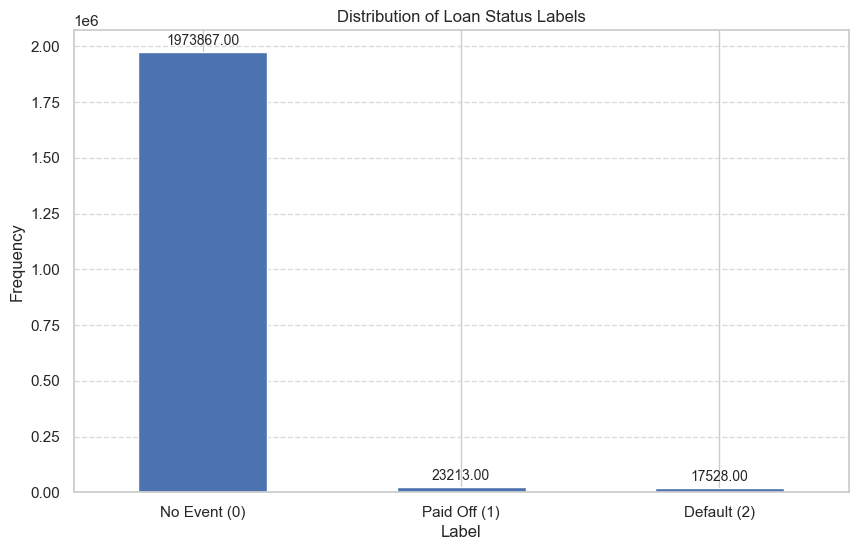

In [43]:
# Assuming df_merged already has the 'Label' column with the new labels
label_counts = df_merged['Label'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = label_counts.plot(kind='bar')
plt.title('Distribution of Loan Status Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2], labels=['No Event (0)', 'Paid Off (1)', 'Default (2)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bar plot with the values
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.2f'), 
                  (bar.get_x() + bar.get_width() / 2, 
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# Show the plot
plt.show()

In [82]:
# columns not needed in modeling
columns_to_drop = ['Original Loan Term', 'Zero Balance Code', 'First Payment Date', 'adj_time', 'adj_year', 'adj_month', 'Property State']

# Drop the columns from df_merged
df_final = df_merged.drop(columns=columns_to_drop)

# Display the first few rows of the updated DataFrame to confirm the drop
df_final.head()

,Loan Sequence Number,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Current Interest Rate,Delinquency Due to Disaster,Interest Bearing UPB,Original UPB,Mortgage Insurance Percentage (MI %),Original Loan-to-Value (LTV),Original Interest Rate,Channel,Loan Purpose,Super Conforming Flag,Credit Score,First Time Homebuyer Flag,Original Debt-to-Income (DTI) Ratio,Number of Borrowers,Number of Units,Occupancy Status,Property Type,Property Valuation Method,Valid DTI Ratio,Housing Price,CPI,Unemployment_Rate,Recession,Label
0,F11Q10000044,2011-02-01,135000.0,0,0.0,360.0,4.625,0,135000.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,PU,9.0,1,127.545095,0.960037,5.6,14.4,0
1,F11Q10000044,2011-03-01,135000.0,0,1.0,359.0,4.625,0,135000.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,PU,9.0,1,127.276039,1.123882,5.5,14.4,0
2,F11Q10000044,2011-04-01,135000.0,0,2.0,358.0,4.625,0,135000.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,PU,9.0,1,126.871005,1.186101,5.4,10.3,0
3,F11Q10000044,2011-05-01,134000.0,0,3.0,357.0,4.625,0,134000.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,PU,9.0,1,126.464664,1.215550,5.4,10.3,0
4,F11Q10000044,2011-06-01,134000.0,0,4.0,356.0,4.625,0,134000.0,135000.0,0.0,55.0,4.625,B,C,0,719.0,N,49.0,2.0,1.0,P,PU,9.0,1,125.976994,1.261395,5.5,10.3,0


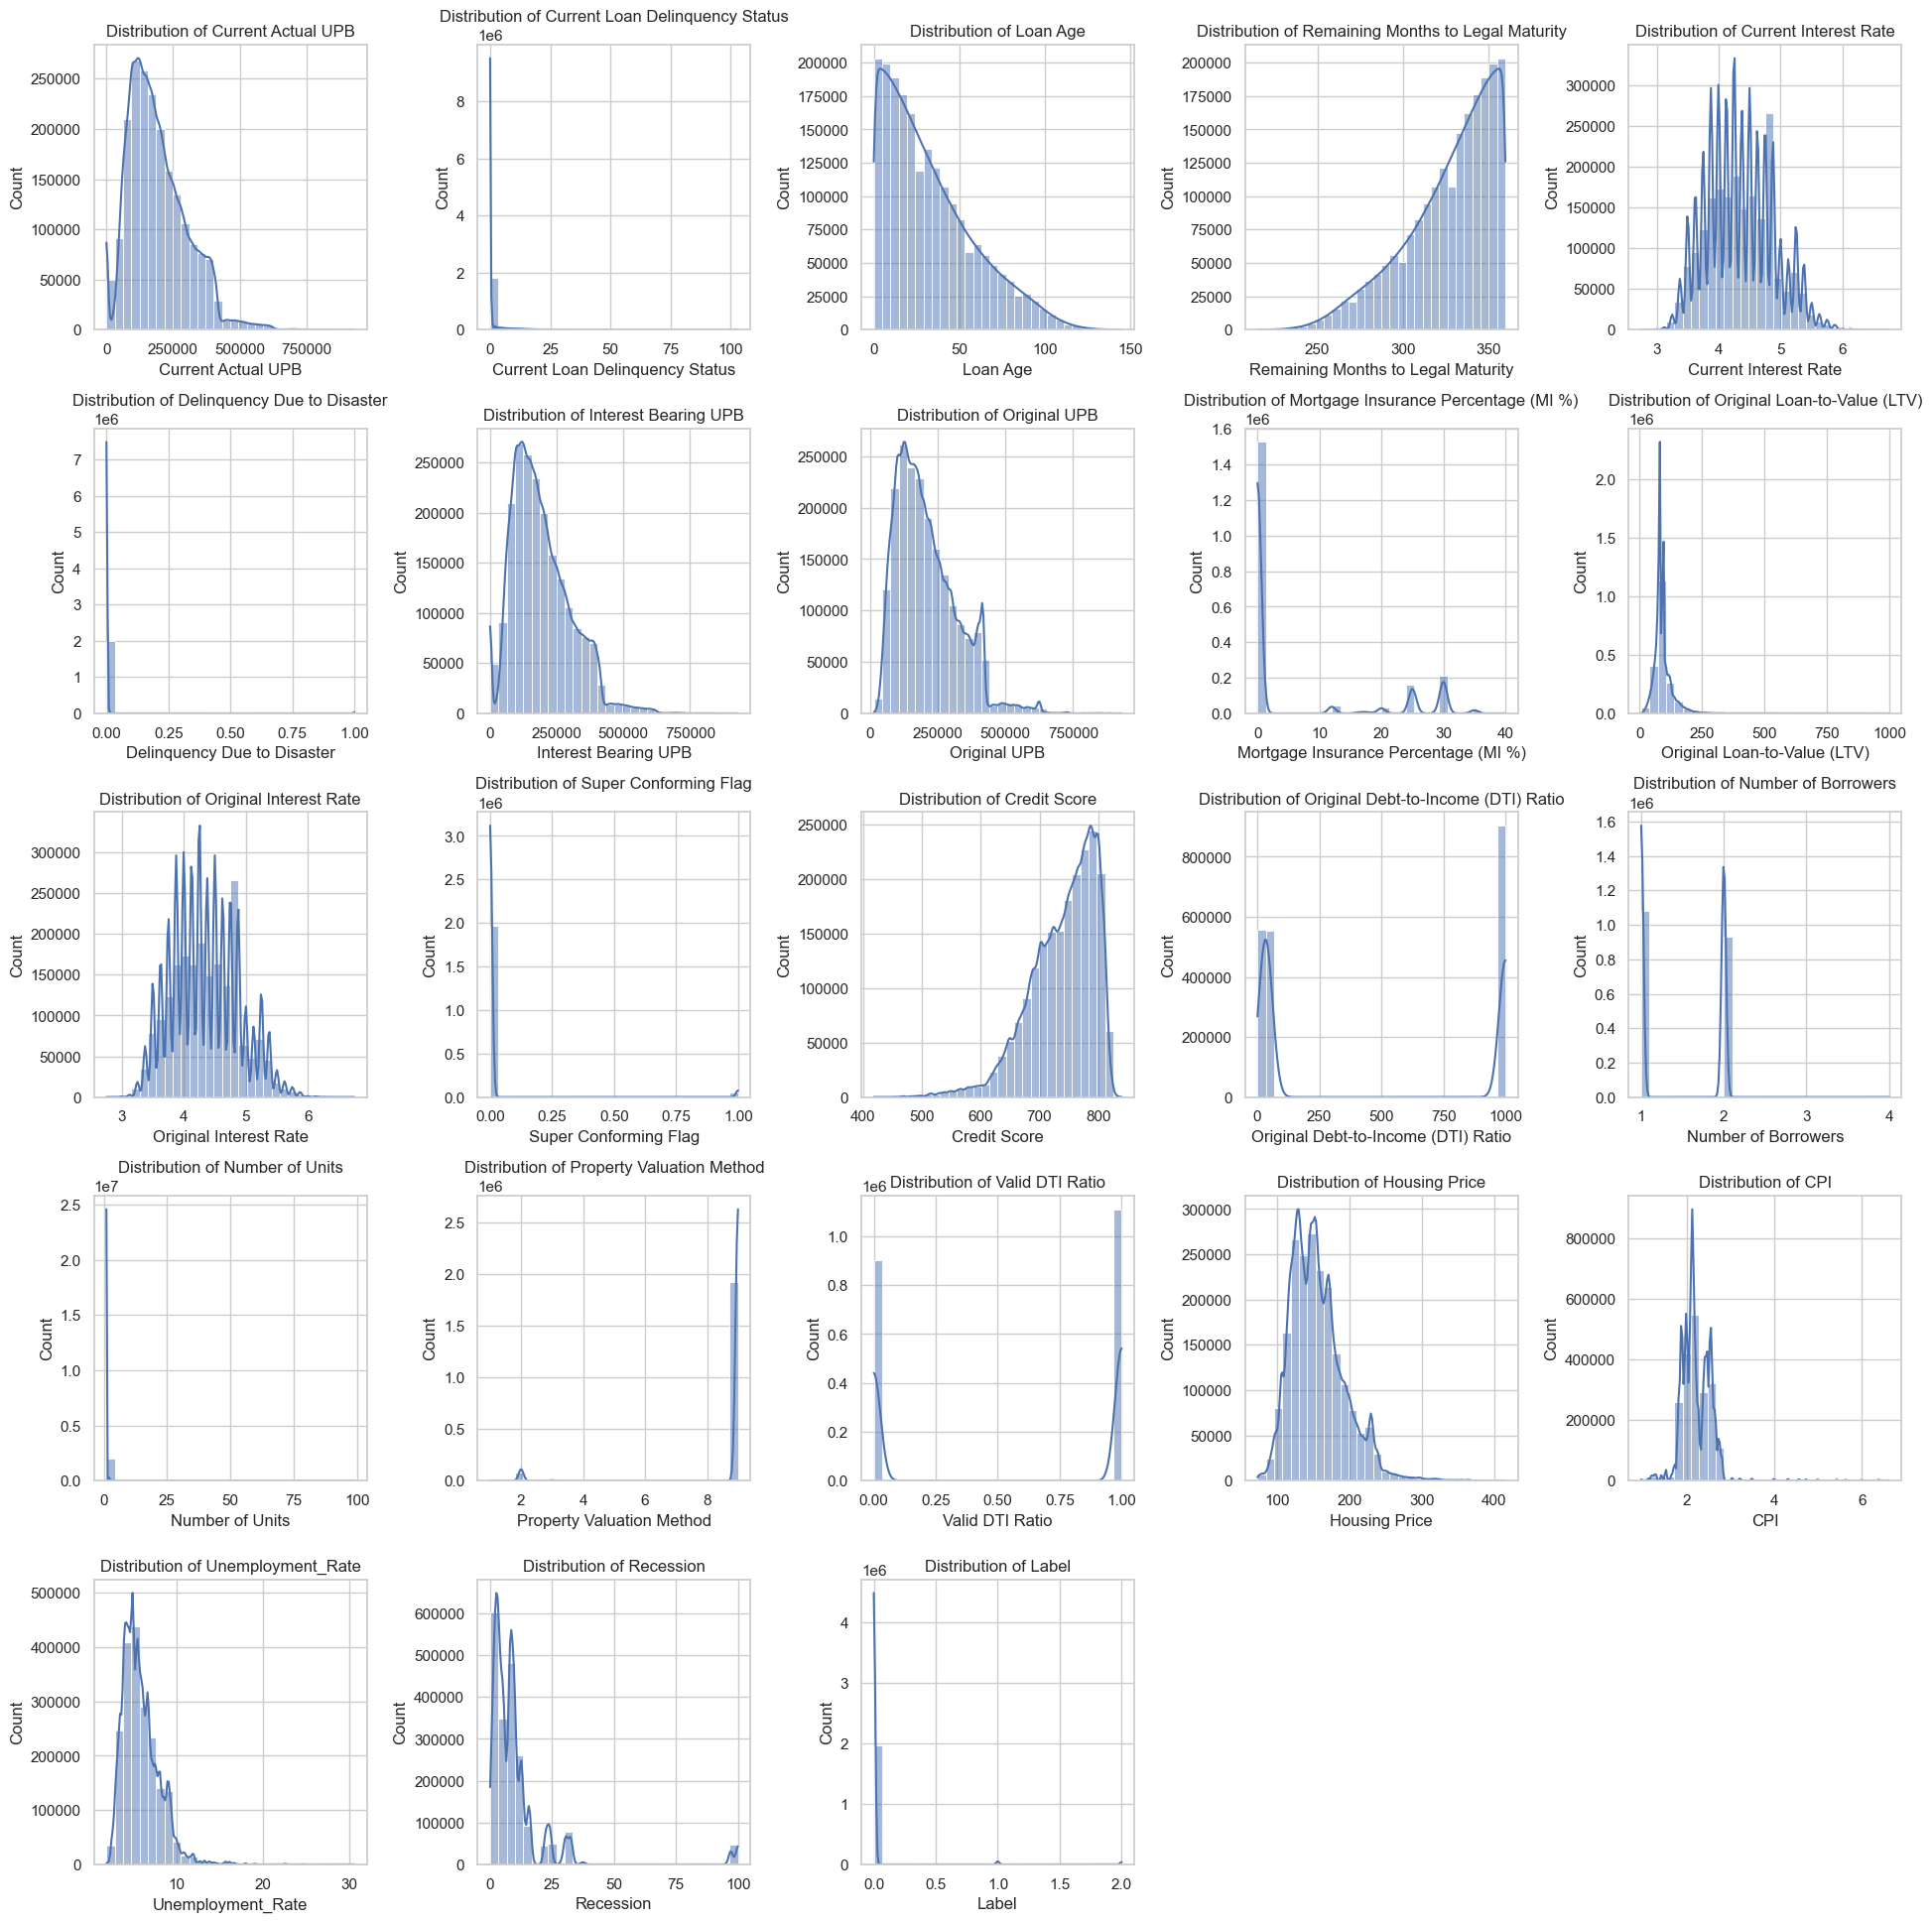

In [83]:
import math

# Assuming df_final is already defined and is the DataFrame you're working with
numeric_columns = df_final.select_dtypes(include=[np.number]).columns

# Determine the grid size based on the number of numeric columns
n_cols = int(np.ceil(np.sqrt(len(numeric_columns))))
n_rows = int(np.ceil(len(numeric_columns) / n_cols))

# Create a subplot grid with enough rows and columns to fit all numeric columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))

# Adjust the space between plots
plt.tight_layout(pad=4)

# Flatten the array of axes for easy iteration
axes_flat = axes.flatten()

# Hide any extra subplots that won't have a plot
for i in range(len(numeric_columns), len(axes_flat)):
    axes_flat[i].axis('off')

# Iterate over columns and corresponding axes to plot
for i, col in enumerate(numeric_columns):
    ax = axes_flat[i]
    sns.histplot(df_final[col], kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_ylabel('Count')

plt.show()

## One-hot Encoding of Categorical Variables

In [89]:
columns_categorical = [
       'Channel',
       'Loan Purpose',
       'First Time Homebuyer Flag',
       'Occupancy Status',
       'Property Type',
       'Property Valuation Method']

# Perform one-hot encoding on the categorical columns
df_encoded = pd.get_dummies(df_final, columns=columns_categorical)

## Output processed dataframe

In [92]:
# Define paths for the CSV files on the desktop
final_csv_path = "/Users/Miracles/Desktop/df_final.csv"

# Output dataframes to CSV
df_encoded.to_csv(final_csv_path, index=False)